# Adding Noise to Perfect Data

### Imports

In [31]:
import random
import warnings
from typing import List, Dict
from statistics import mean, stdev
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, patches
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
from IPython.display import HTML, Image
from scipy.stats import norm
warnings.filterwarnings("ignore")

matplotlib.rcParams["animation.embed_limit"] = 2**128
matplotlib.rcParams["figure.dpi"] = 300

### Generating Data

In [2]:
from random import randint, shuffle

samples = 1000

def generate_random_values():
    return [randint(0,50) * randint(0,50) for _ in range(samples)]

ms = [2 for _ in range(samples)]
xs = generate_random_values()
cs = [50 for _ in range(samples)]

ys = []
for i in range(samples):
    y = ms[i] * xs[i] + cs[i]
    ys.append(y)
noise = [random.randint(0,100) for _ in range(samples)]

data = {
    "ms": ms,
    "xs": xs,
    "cs": cs,
    "noise": noise, 
    "ys": ys
}

df = pd.DataFrame(data=data)
test = df.head(5)
test

,ms,xs,cs,noise,ys
0,2,36,50,70,122
1,2,170,50,3,390
2,2,156,50,5,362
3,2,1128,50,5,2306
4,2,2000,50,29,4050


In [33]:
columns = ["ms", "xs", "cs", "noise"]
all_columns = columns + ["ys"]
X_train = df[columns]
y_train = df["ys"]

### Defining Model

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=[4]))
model.add(tf.keras.layers.Dense(units=1))
model.summary()
opt = Adam(0.01)
model.compile(optimizer=opt, loss="mean_squared_error")

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


2022-10-30 21:11:22.943549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-30 21:11:22.943662: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Data Structure to Capture Weights During Trianing

In [5]:
def create_history(columns: int, nodes: int) -> Dict:
    history = {i:{j: [] for j in range(nodes)} for i in range(columns)}
    return history

In [6]:
history = create_history(4, 4)

### Training Model and Capturing Weights

In [7]:
for epoch in range(1, 501):
    print(f"RUNNING EPOCH {epoch}")
    hist = model.fit(X_train, y_train, epochs=1)
    all_weights = model.layers[0].get_weights()[0].tolist()
    for weights in range(len(all_weights)):
        for weight in range(len(all_weights[weights])):
            history[weights][weight].append(all_weights[weights][weight])

RUNNING EPOCH 1


2022-10-30 21:11:25.670858: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-30 21:11:25.816888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step - loss: 1941030.0000
RUNNING EPOCH 2
32/32 [==============================] - 0s 4ms/step - loss: 231029.2188
RUNNING EPOCH 3
32/32 [==============================] - 0s 4ms/step - loss: 8989.8848
RUNNING EPOCH 4
32/32 [==============================] - 0s 4ms/step - loss: 4584.5229
RUNNING EPOCH 5
32/32 [==============================] - 0s 4ms/step - loss: 4004.9424
RUNNING EPOCH 6
32/32 [==============================] - 0s 4ms/step - loss: 3601.8301
RUNNING EPOCH 7
32/32 [==============================] - 0s 5ms/step - loss: 3225.8057
RUNNING EPOCH 8
32/32 [==============================] - 0s 5ms/step - loss: 2883.5188
RUNNING EPOCH 9
32/32 [==============================] - 0s 5ms/step - loss: 2583.3652
RUNNING EPOCH 10
32/32 [==============================] - 0s 5ms/step - loss: 2313.8071
RUNNING EPOCH 11
32/32 [==============================] - 0s 4ms/step - loss: 2082.7947
RUNNING EPOCH 12
32/32 [============================

### Sense Checking Results

In [34]:
test["result"] = model.predict(test[columns])
test

1/1 [==============================] - 0s 11ms/step


,ms,xs,cs,noise,ys,result
0,2,36,50,70,122,121.999771
1,2,170,50,3,390,390.000122
2,2,156,50,5,362,362.000092
3,2,1128,50,5,2306,2306.000000
4,2,2000,50,29,4050,4049.999756


### Colours

In [9]:
light = "#90CCF4"
darker = "#5DA2D5"
important = "#F3D250"
noise = "#F78888"
other = "#ECECEC"

### Animated Bar Graph

In [10]:
# frames = 500
# fig, ax = plt.subplots(figsize=(16,8))

In [11]:
# def run(i):
#   ax.cla()
#   ax.set_xlabel("Input Column and Node Number")
#   ax.set_ylabel("Weight")
#   ax.set_ylim(-1.5, 1.5)
#   m_one = history[0][0][i]
#   m_two = history[0][1][i]
#   m_three = history[0][2][i]
#   m_four = history[0][3][i]
  
#   x_one = history[1][0][i]
#   x_two = history[1][1][i]
#   x_three = history[1][2][i]
#   x_four = history[1][3][i]

#   c_one = history[2][0][i]
#   c_two = history[2][1][i]
#   c_three = history[2][2][i]
#   c_four = history[2][3][i]

#   noise_one = history[3][0][i]
#   noise_two = history[3][1][i]
#   noise_three = history[3][2][i]
#   noise_four = history[3][3][i]
#   ax.bar(
#     [
#       "M1", "M2", "M3", "M4", 
#       "X1", "X2", "X3", "X4", 
#       "C1", "C2", "C3", "C4", 
#       "Noise 1", "Noise 2", "Noise 3", "Noise 4", 
#     ],
#     [
#       m_one, m_two, m_three, m_four,
#       x_one, x_two, x_three, x_four,
#       c_one, c_two, c_three, c_four,
#       noise_two, noise_two, noise_three, noise_four,
#     ],
#     color=[
#       darker, darker, darker, darker,
#       important, important, important, important,
#       light, light, light, light, 
#       noise, noise, noise, noise
#     ]
#   )


In [12]:
# anim = animation.FuncAnimation(fig, run, frames=frames, interval=50)
# HTML(anim.to_html5_video())

### Useful Data Set

In [13]:
start_index = 0
NODES = 4

def get_groups(index: int, nodes: int) -> List:
    group = []
    for i in range(nodes):
        group.append(history[index][i][start_index:])
    return group

In [14]:
ms = get_groups(0, NODES)
xs = get_groups(1, NODES)
cs = get_groups(2, NODES)
noises = get_groups(3, NODES)

### Box Plots

In [15]:
def generate_box_plot(ax, data: List, color: str, label: str, position_offset: int = 0, showfliers: bool = False):
    ax.set_xlabel("Input Column and Node Number")
    ax.set_ylabel("Weight Values")
    color = {"color": color}
    ax.boxplot(
        data,
        positions=[i + position_offset for i in range(1,5)],
        boxprops=color,
        medianprops=color,
        whiskerprops=color,
        capprops=color,
        flierprops={"markeredgecolor": other},
        showfliers=showfliers,
        labels=[f"{label}{i}" for i in range(1,5)]
    )

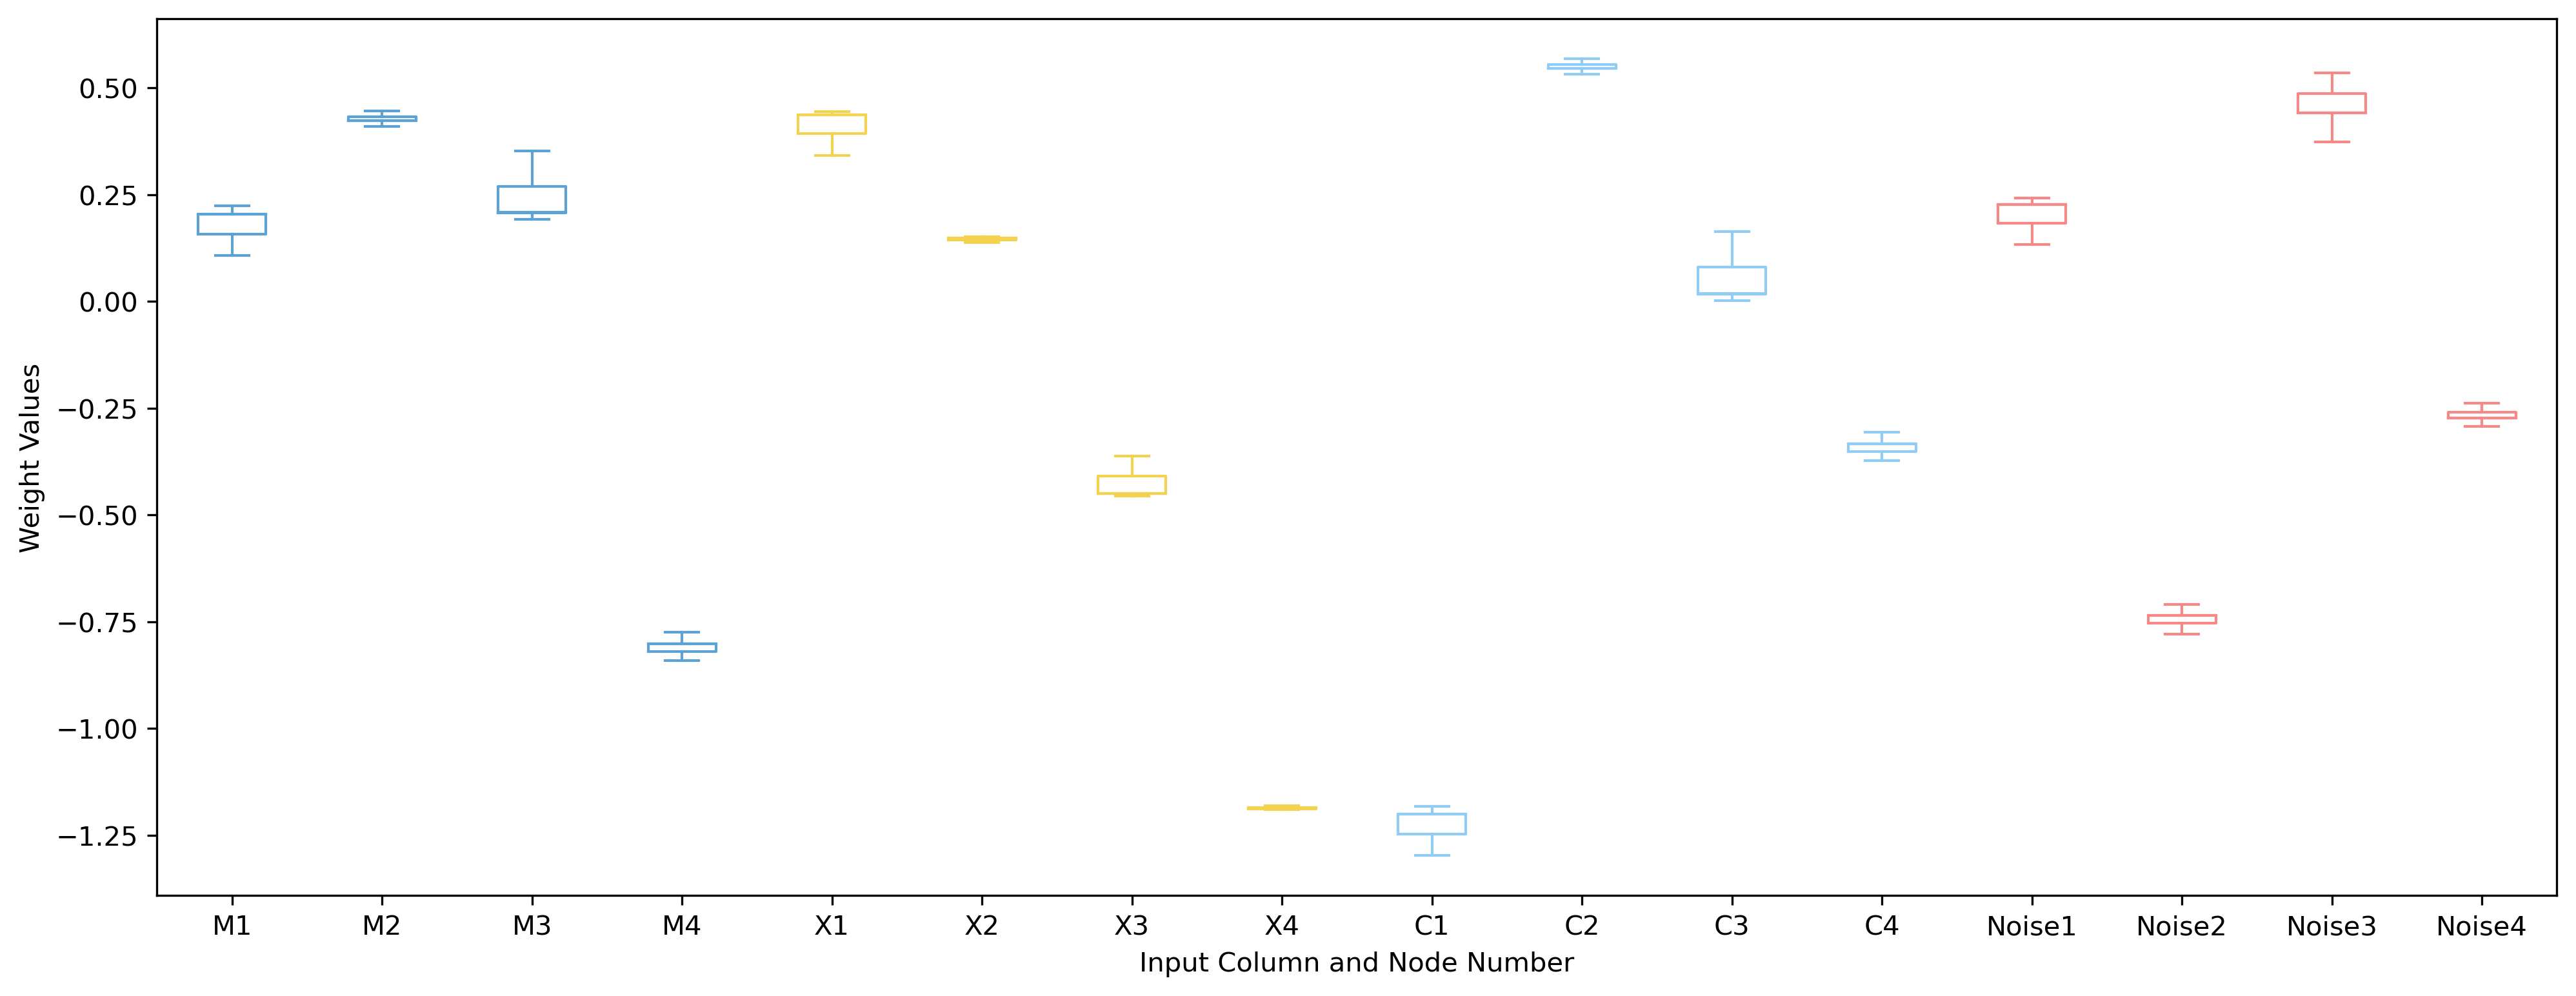

In [16]:
fig, ax = plt.subplots(figsize=(16,6))

generate_box_plot(ax, ms, darker, "M")
generate_box_plot(ax, xs, important, "X", 4)
generate_box_plot(ax, cs, light, "C", 8)
generate_box_plot(ax, noises, noise, "Noise", 12)


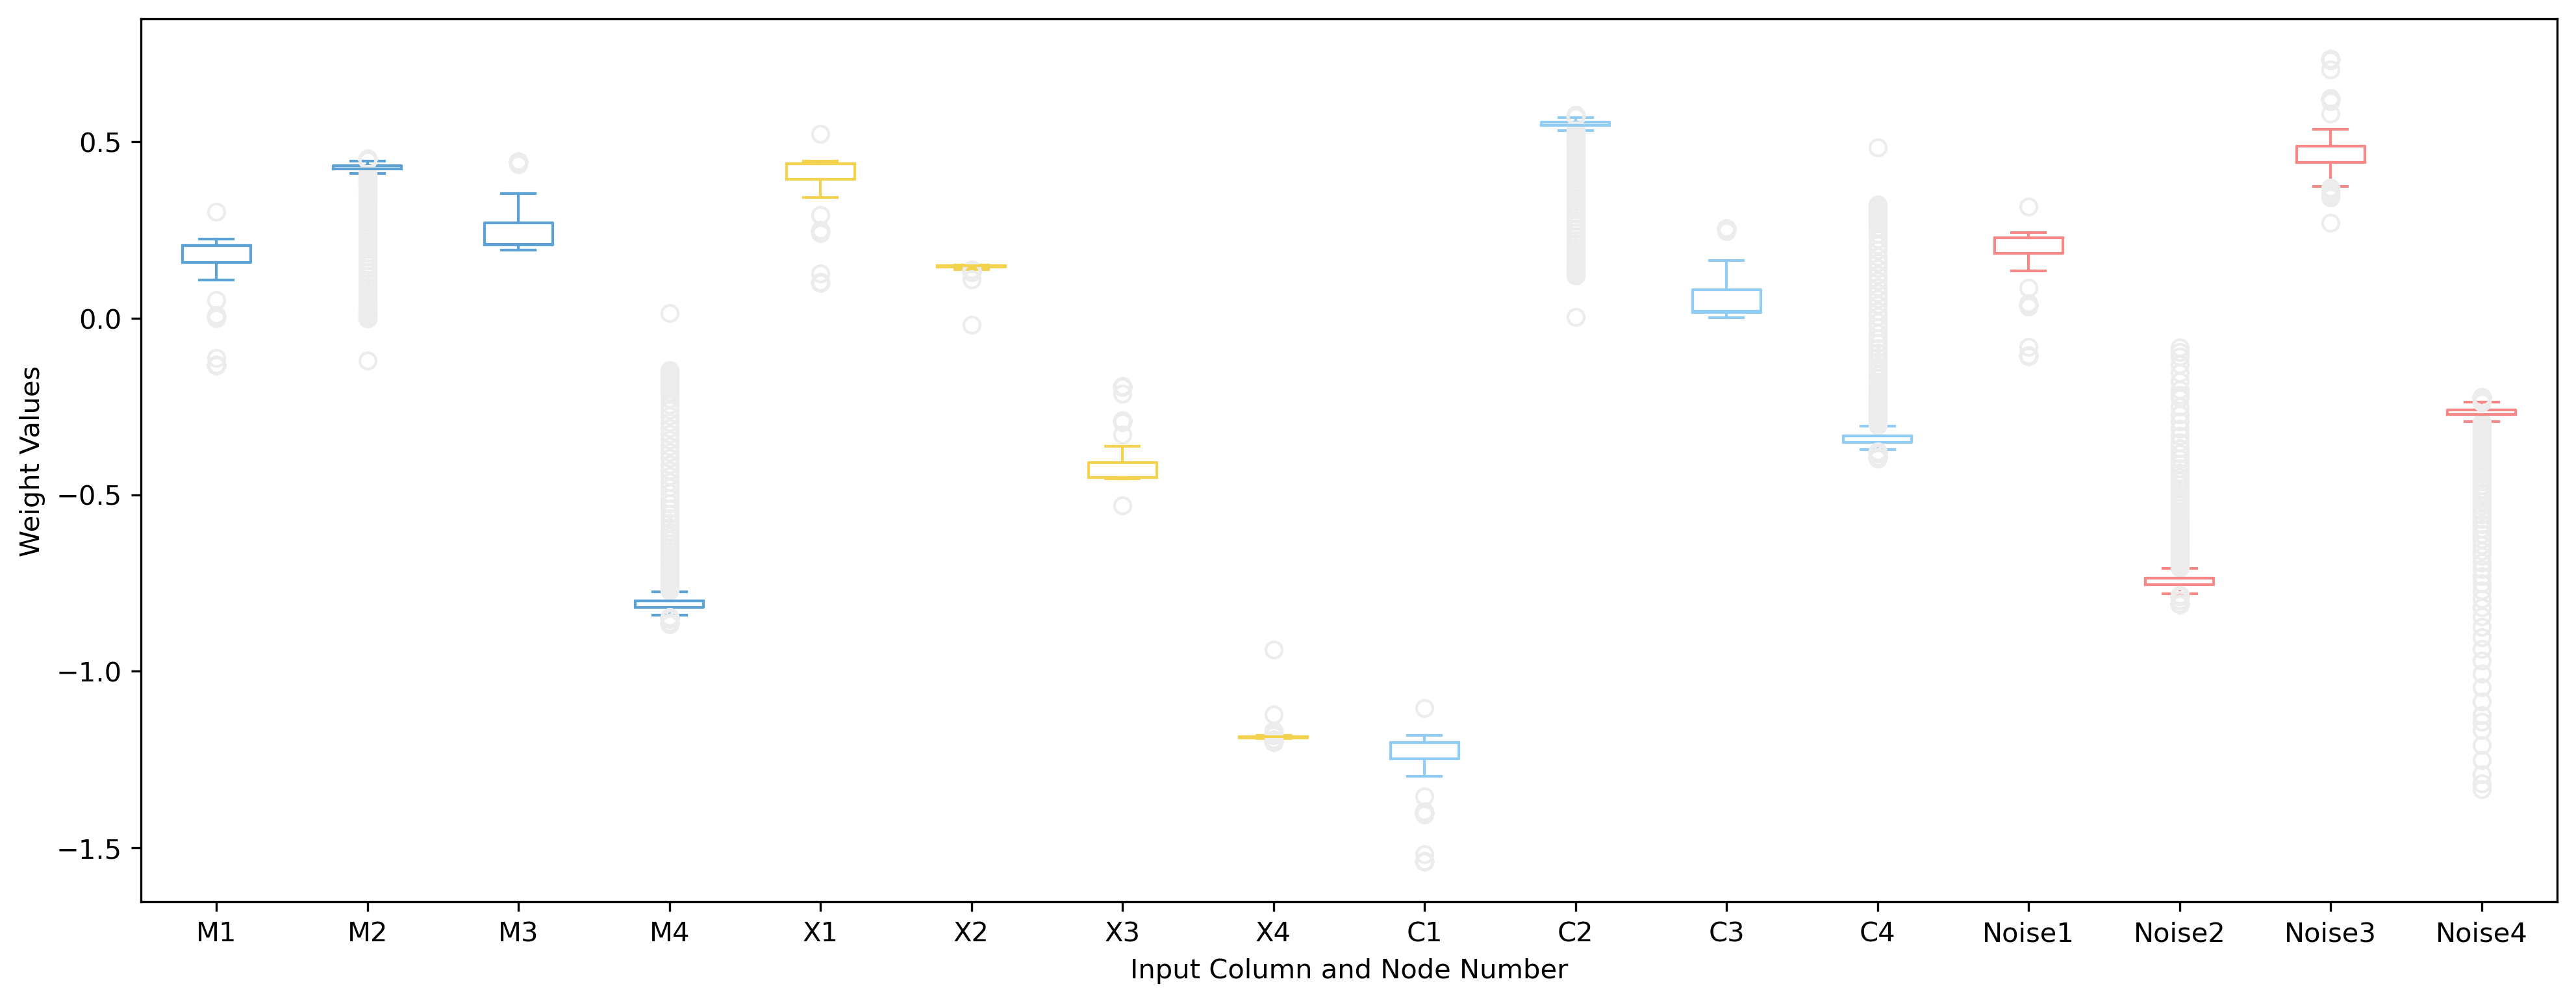

In [17]:
fig, ax = plt.subplots(figsize=(16,6))

generate_box_plot(ax, ms, darker, "M", showfliers=True)
generate_box_plot(ax, xs, important, "X", 4, showfliers=True)
generate_box_plot(ax, cs, light, "C", 8, showfliers=True)
generate_box_plot(ax, noises, noise, "Noise", 12, showfliers=True)

### Standard Deviation Etc.

In [18]:
data = {
    "m_one": ms[0],
    "m_two": ms[1],
    "m_three": ms[2],
    "m_four": ms[3],
    "x_one": xs[0],
    "x_two": xs[1],
    "x_three": xs[2],
    "x_four": xs[3],
    "c_one": cs[0],
    "c_two": cs[1],
    "c_three": cs[2],
    "c_four": cs[3],
    "noise_one": noises[0],
    "noise_two": noises[1],
    "noise_three": noises[2],
    "noise_four": noises[3]
}

columns = [
    "m_one",
    "m_two",
    "m_three",
    "m_four",
    "x_one",
    "x_two",
    "x_three",
    "x_four",
    "c_one",
    "c_two",
    "c_three",
    "c_four",
    "noise_one",
    "noise_two",
    "noise_three",
    "noise_four"
]


odf = pd.DataFrame(data)
odf.head(5)

,m_one,m_two,m_three,m_four,x_one,x_two,x_three,x_four,c_one,c_two,c_three,c_four,noise_one,noise_two,noise_three,noise_four
0,0.300971,-0.119630,0.192094,0.014578,0.521356,-0.019665,-0.529654,-0.937586,-1.104646,0.003250,0.002338,0.482950,0.316224,-0.217477,0.270049,-1.142558
1,0.223568,0.010693,0.266837,-0.171035,0.444376,0.110565,-0.455361,-1.122653,-1.182047,0.133572,0.077081,0.297337,0.242704,-0.095267,0.341136,-1.316801
2,0.216890,0.034935,0.272653,-0.210641,0.437583,0.140003,-0.449684,-1.171007,-1.188726,0.157814,0.082897,0.257731,0.236643,-0.083844,0.346929,-1.334345
3,0.216216,0.026350,0.273786,-0.195529,0.437159,0.138258,-0.449151,-1.167865,-1.189400,0.149229,0.084030,0.272843,0.235411,-0.108211,0.349424,-1.291297
4,0.215965,0.020105,0.274370,-0.184621,0.437168,0.138898,-0.449194,-1.168970,-1.189651,0.142985,0.084614,0.283751,0.234538,-0.131034,0.351509,-1.251145


In [19]:
m_one_std = odf["m_one"].agg([np.mean, np.std])
m_two_std = odf["m_two"].agg([np.mean, np.std])
m_three_std = odf["m_three"].agg([np.mean, np.std])
m_four_std = odf["m_four"].agg([np.mean, np.std])

noise_one_std = odf["noise_one"].agg([np.mean, np.std])
noise_two_std = odf["noise_two"].agg([np.mean, np.std])
noise_three_std = odf["noise_three"].agg([np.mean, np.std])
noise_four_std = odf["noise_four"].agg([np.mean, np.std])


In [20]:
std_df = odf.std().to_frame()
mean_df = odf.mean().to_frame()
std_df.columns = ["Std"]
mean_df.columns = ["Mean"]
merged_df = pd.merge(std_df, mean_df, left_index=True, right_index=True)

''

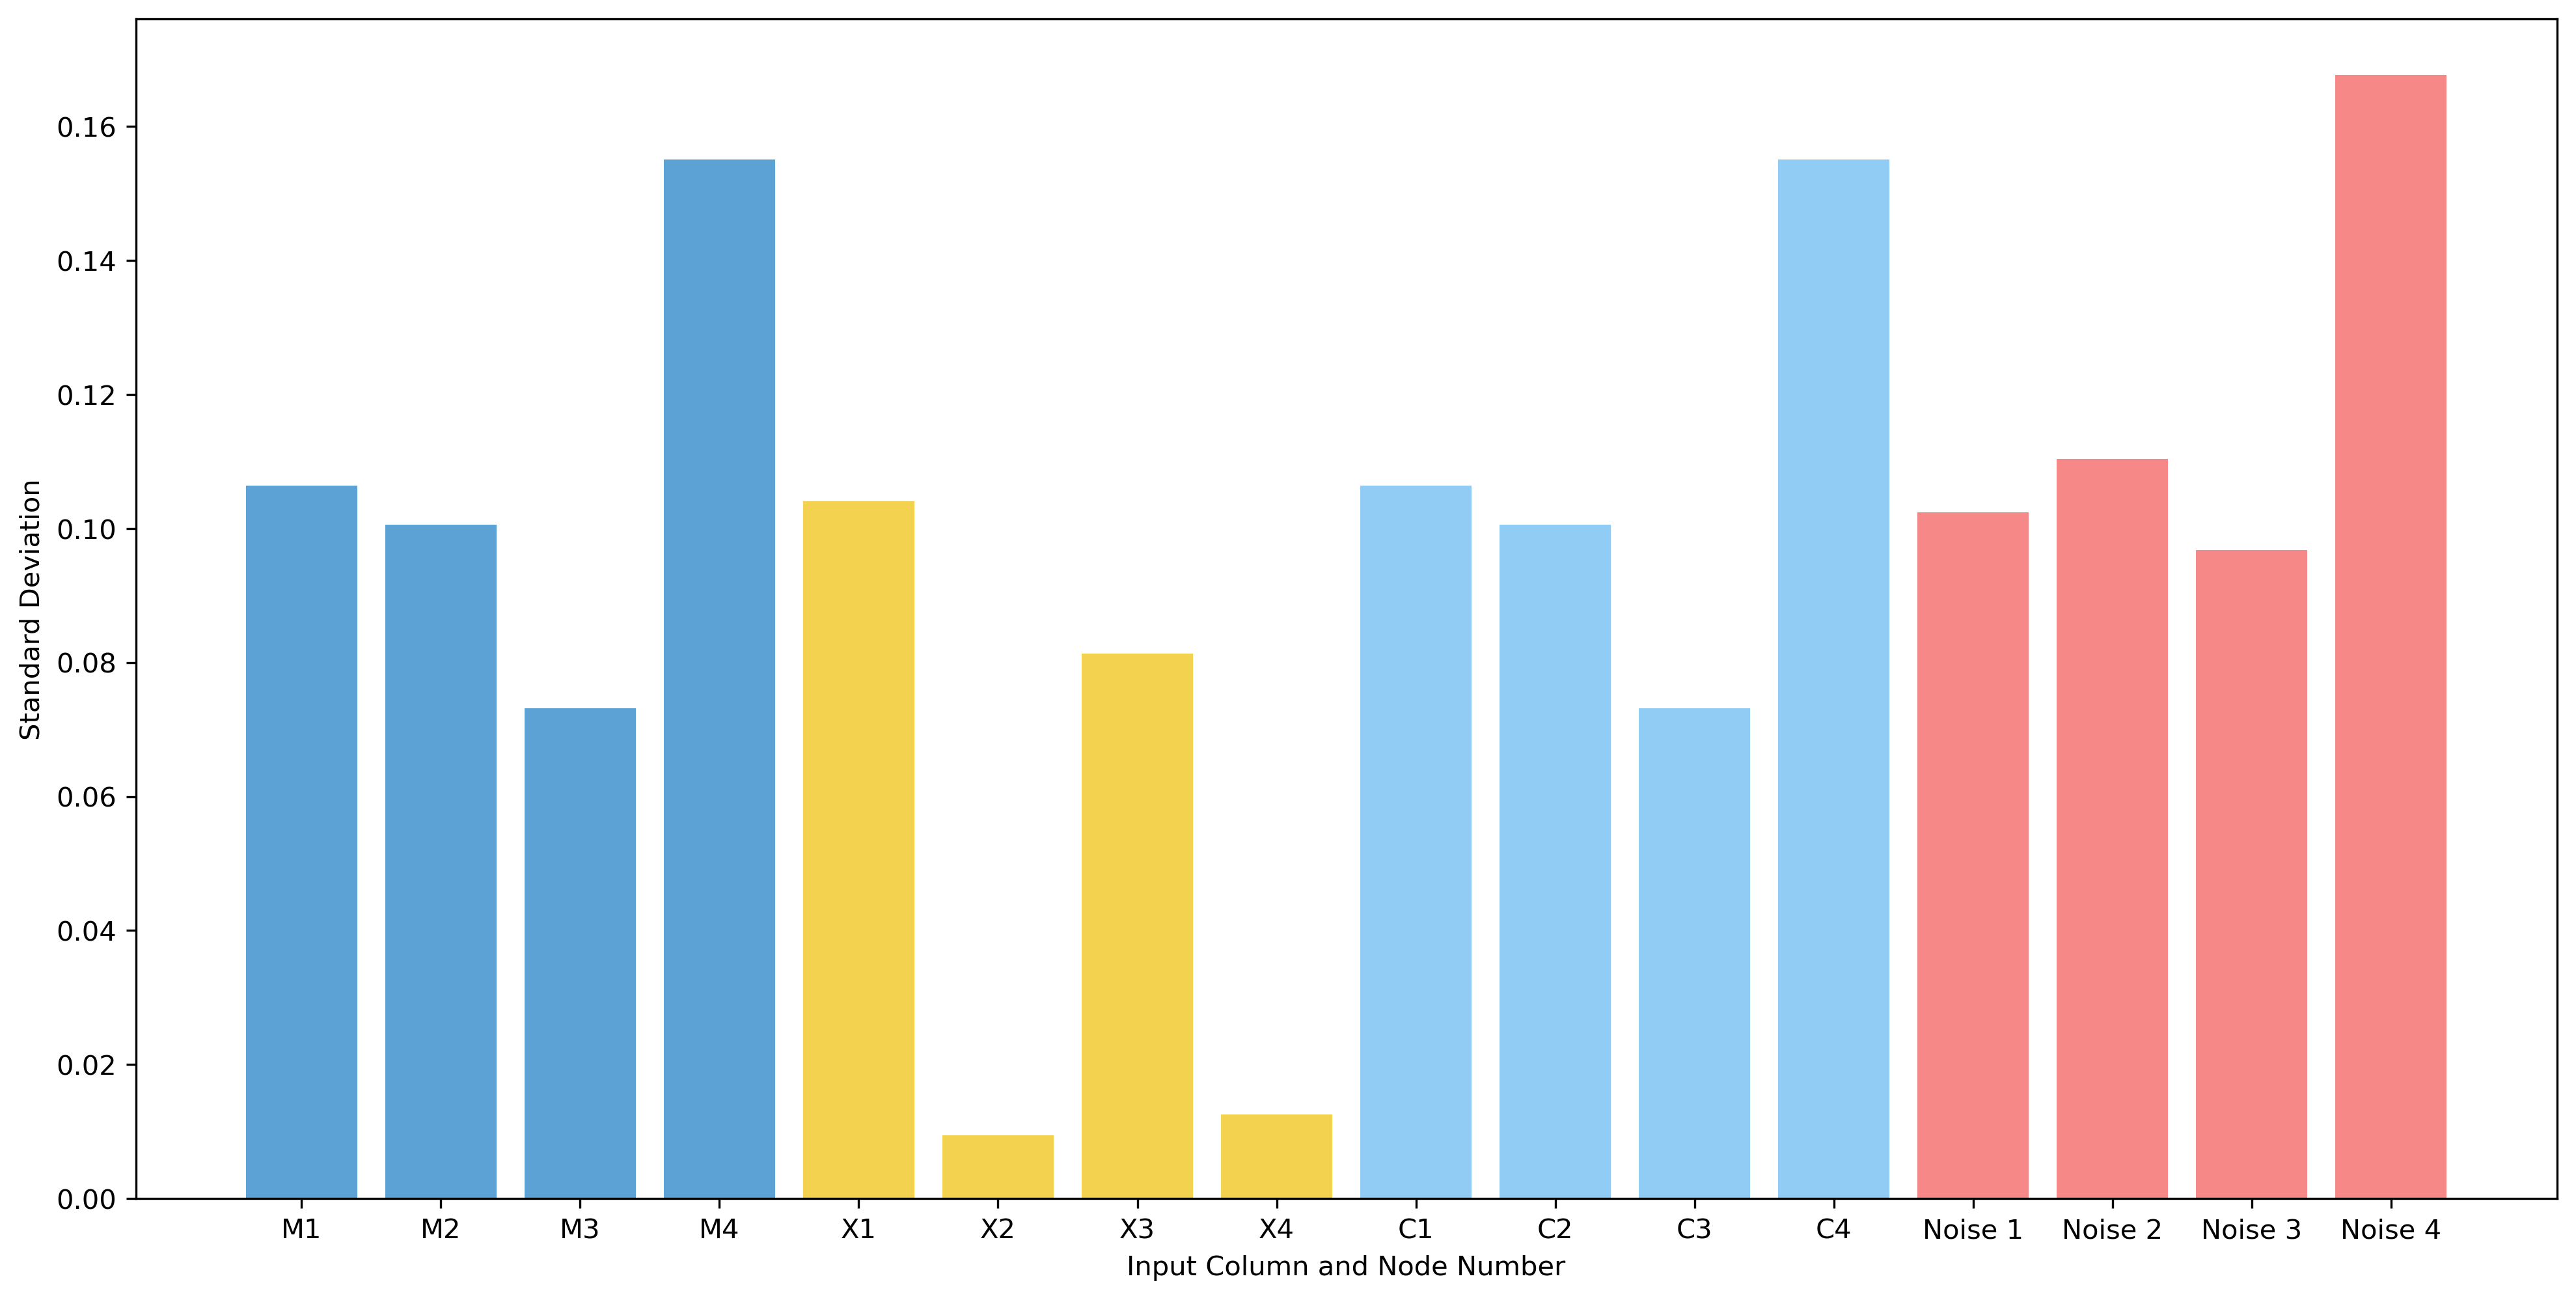

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(
    [
      "M1", "M2", "M3", "M4", 
      "X1", "X2", "X3", "X4", 
      "C1", "C2", "C3", "C4", 
      "Noise 1", "Noise 2", "Noise 3", "Noise 4", 
    ],
    [
      std_df["Std"].loc["m_one"], std_df["Std"].loc["m_two"], std_df["Std"].loc["m_three"], std_df["Std"].loc["m_four"],
      std_df["Std"].loc["x_one"], std_df["Std"].loc["x_two"], std_df["Std"].loc["x_three"], std_df["Std"].loc["x_four"],
      std_df["Std"].loc["c_one"], std_df["Std"].loc["c_two"], std_df["Std"].loc["c_three"], std_df["Std"].loc["c_four"],
      std_df["Std"].loc["noise_one"], std_df["Std"].loc["noise_two"], std_df["Std"].loc["noise_three"], std_df["Std"].loc["noise_four"],
    ],
    color=[
      darker, darker, darker, darker,
      important, important, important, important,
      light, light, light, light,
      noise, noise, noise, noise
    ]
)
ax.set_xlabel("Input Column and Node Number")
ax.set_ylabel("Standard Deviation")
;

In [22]:
g_ms = sum([std_df["Std"].loc["m_one"], std_df["Std"].loc["m_two"], std_df["Std"].loc["m_three"], std_df["Std"].loc["m_four"]])
g_xs = sum([std_df["Std"].loc["x_one"], std_df["Std"].loc["x_two"], std_df["Std"].loc["x_three"], std_df["Std"].loc["x_four"]])
g_cs = sum([std_df["Std"].loc["c_one"], std_df["Std"].loc["c_two"], std_df["Std"].loc["c_three"], std_df["Std"].loc["c_four"]])
g_noises = sum([std_df["Std"].loc["noise_one"], std_df["Std"].loc["noise_two"], std_df["Std"].loc["noise_three"], std_df["Std"].loc["noise_four"]])

''

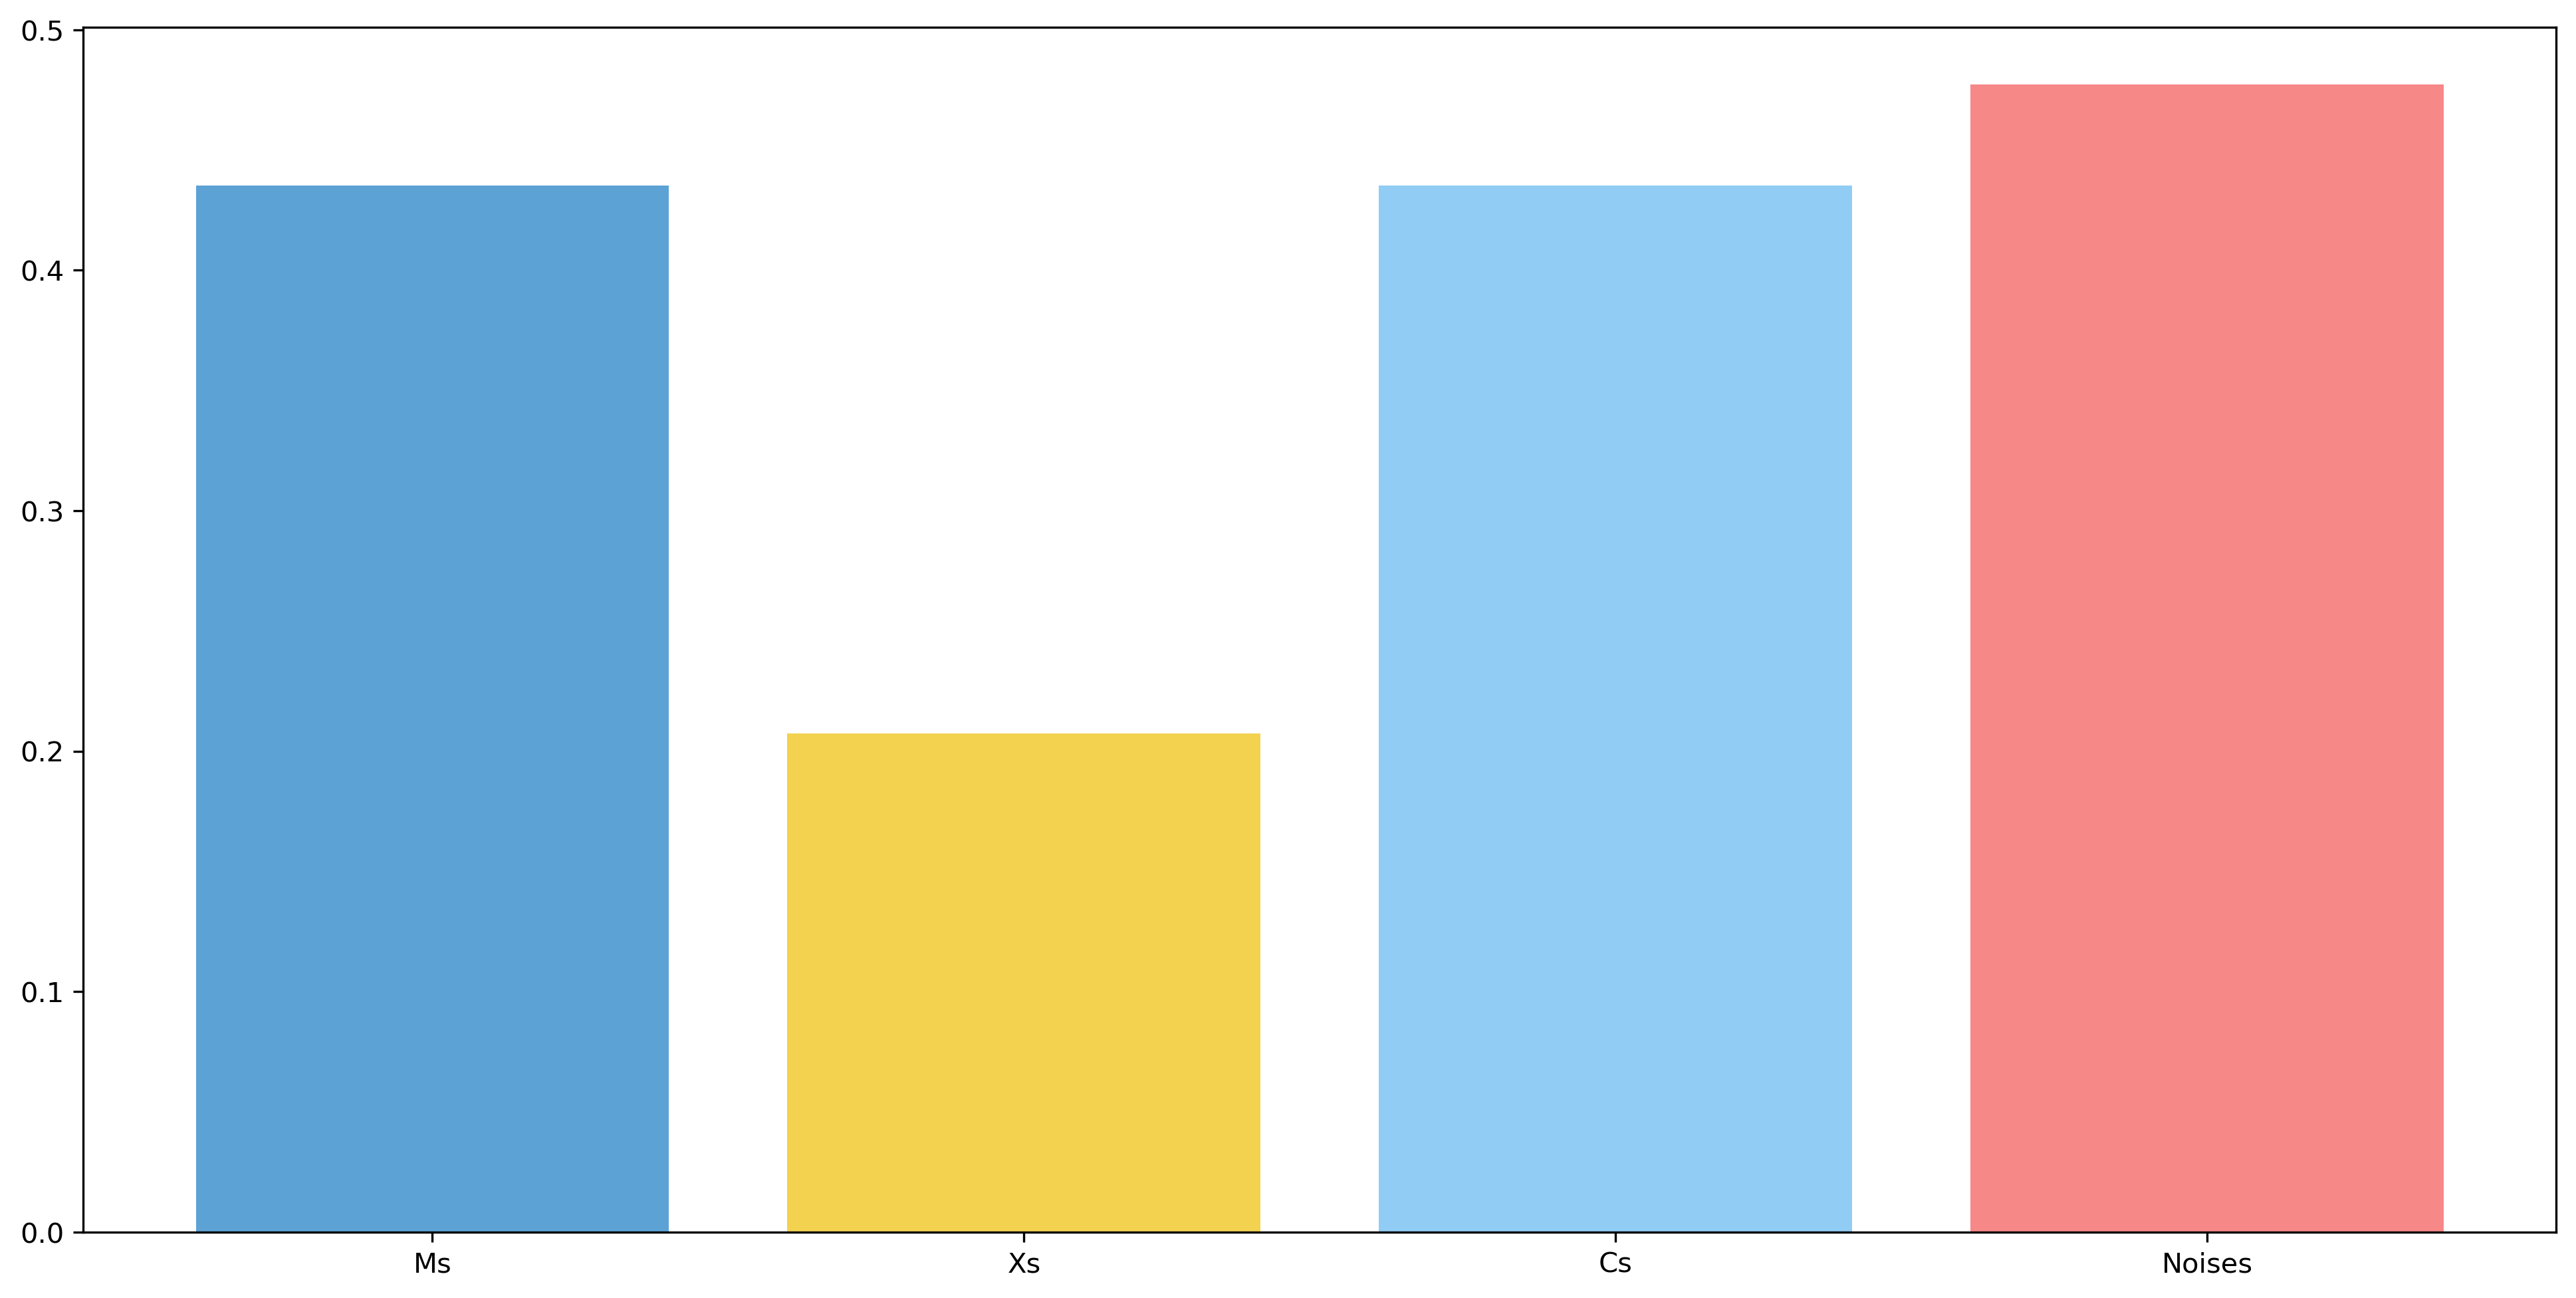

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(
    [
      "Ms", "Xs", "Cs", "Noises"
    ],
    [
      g_ms, g_xs, g_cs, g_noises
    ],
    color=[darker, important, light, noise]
)
;

### Scatter Plots

In [24]:
def prepare_scatter_df(data: List, bin: int, abs: bool = False):
    indices = [i for i in range(len(data))]
    df = pd.DataFrame(indices, columns=["Indices"])
    rdf = pd.DataFrame(data, columns=["Readings"])
    if abs:
        rdf = rdf.explode("Readings", ignore_index=True).abs()
    else:
        rdf = rdf.explode("Readings", ignore_index=True)
    df["Readings"] = rdf["Readings"]
    df["Bin"] = [bin for _ in range(len(data))]
    return df

In [25]:
def get_group_by_node(index: int) -> List:
    group = []
    for i in list(history.keys()):
        group.append(history[i][index])
    return group

In [26]:
def call_prepare_scatter_df(data: List, abs: bool = False):
    dfs = []
    for i, item in enumerate(data):
        dfs.append(prepare_scatter_df(item, i, abs))
    return pd.concat(dfs)

In [27]:
def create_scatter(scatter_dfs):
    fig, ax = plt.subplots(figsize=(16,6))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Weight")
    colormap = np.array([darker, important, light, noise])
    categories = np.array(scatter_dfs["Bin"])
    scatter = ax.scatter(x=scatter_dfs["Indices"], y=scatter_dfs["Readings"], c=colormap[categories], s=[2])

In [36]:
groups = [get_group_by_node(i) for i in range(len(history.keys()))]

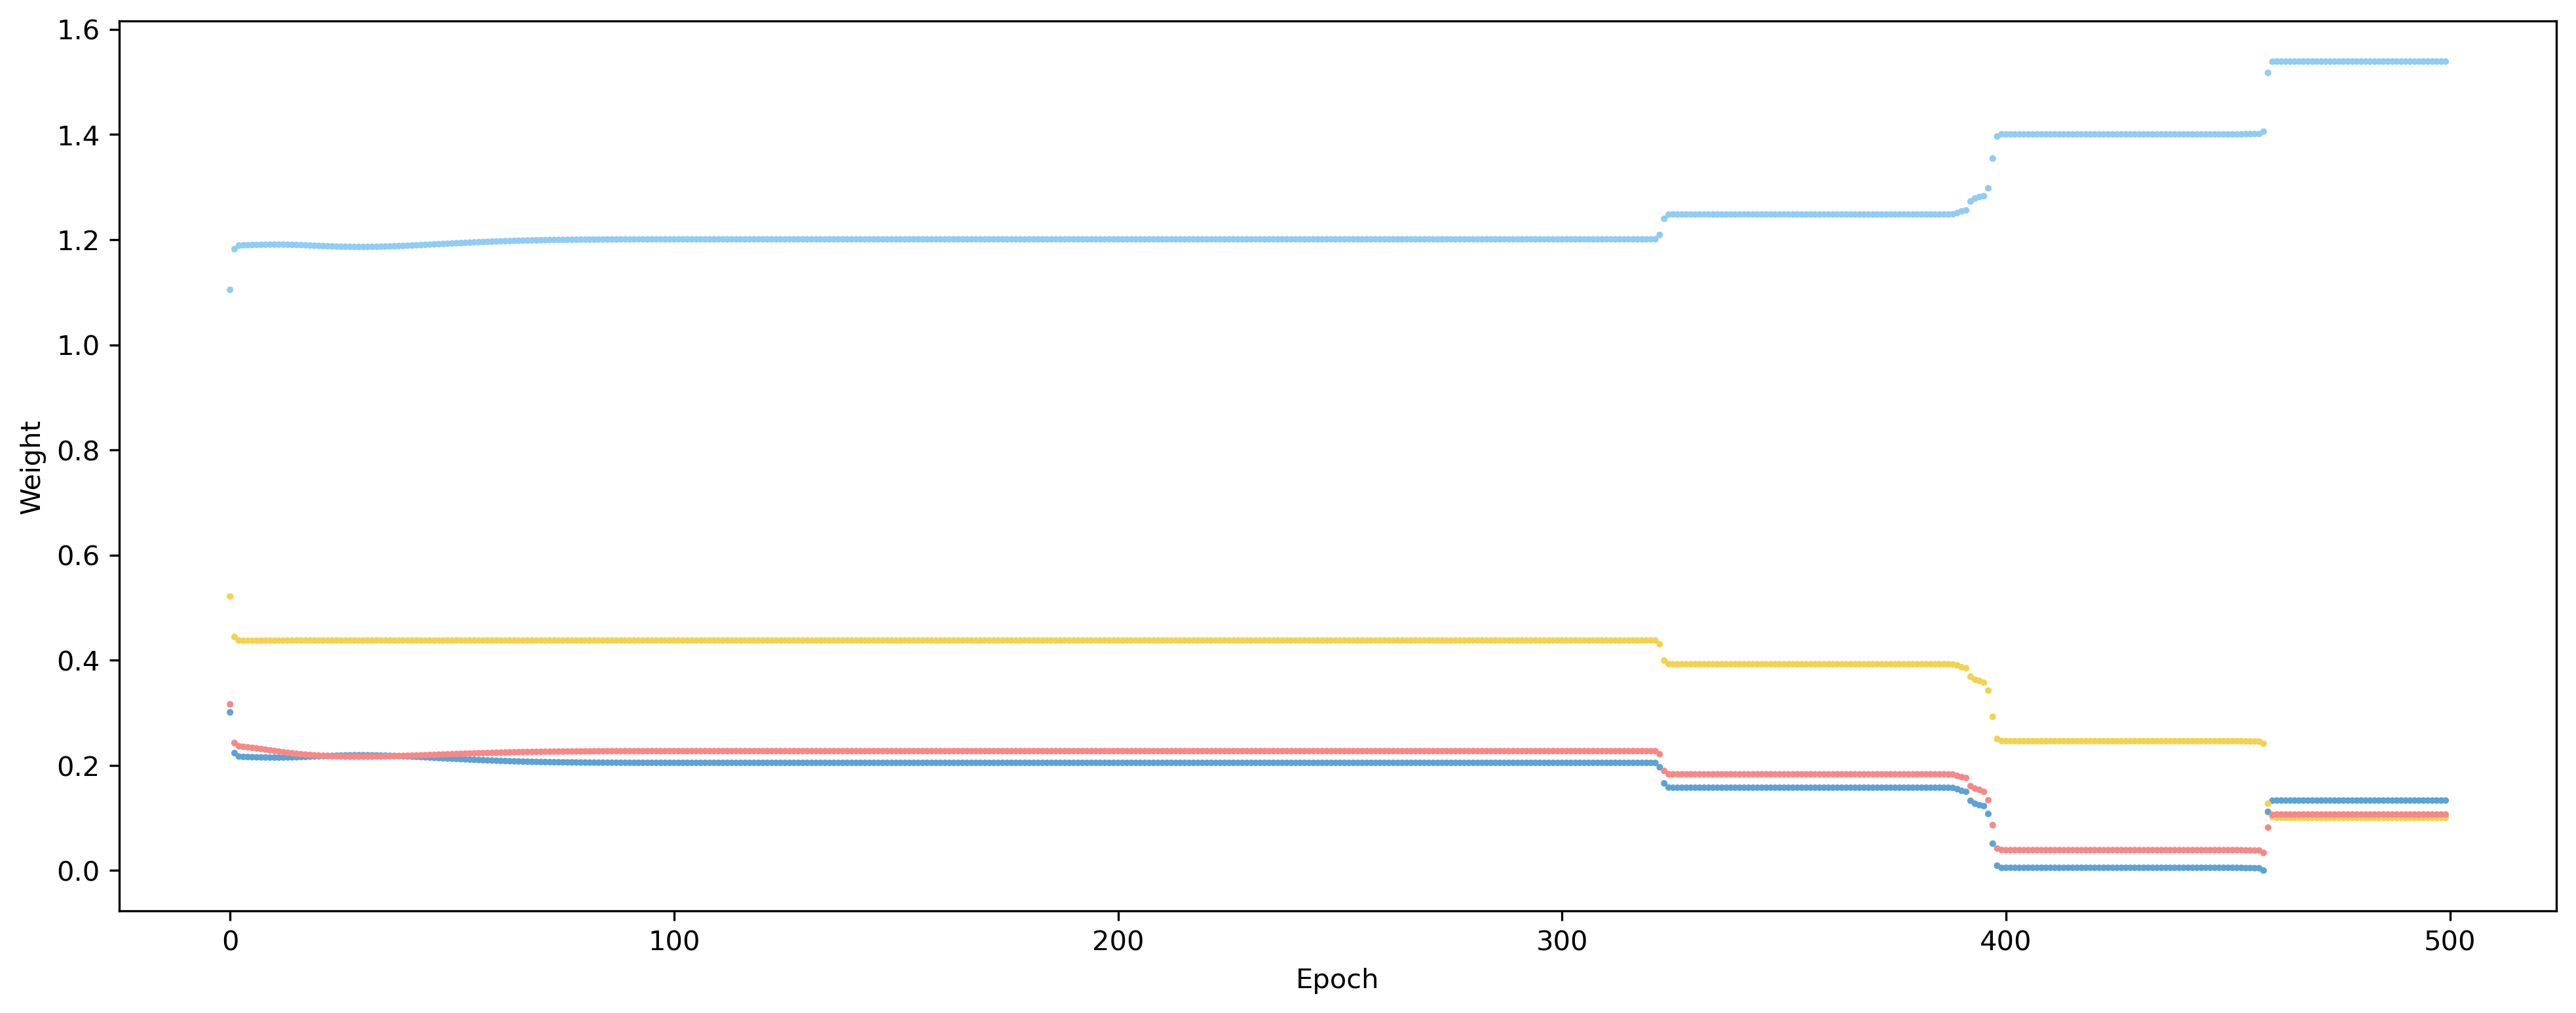

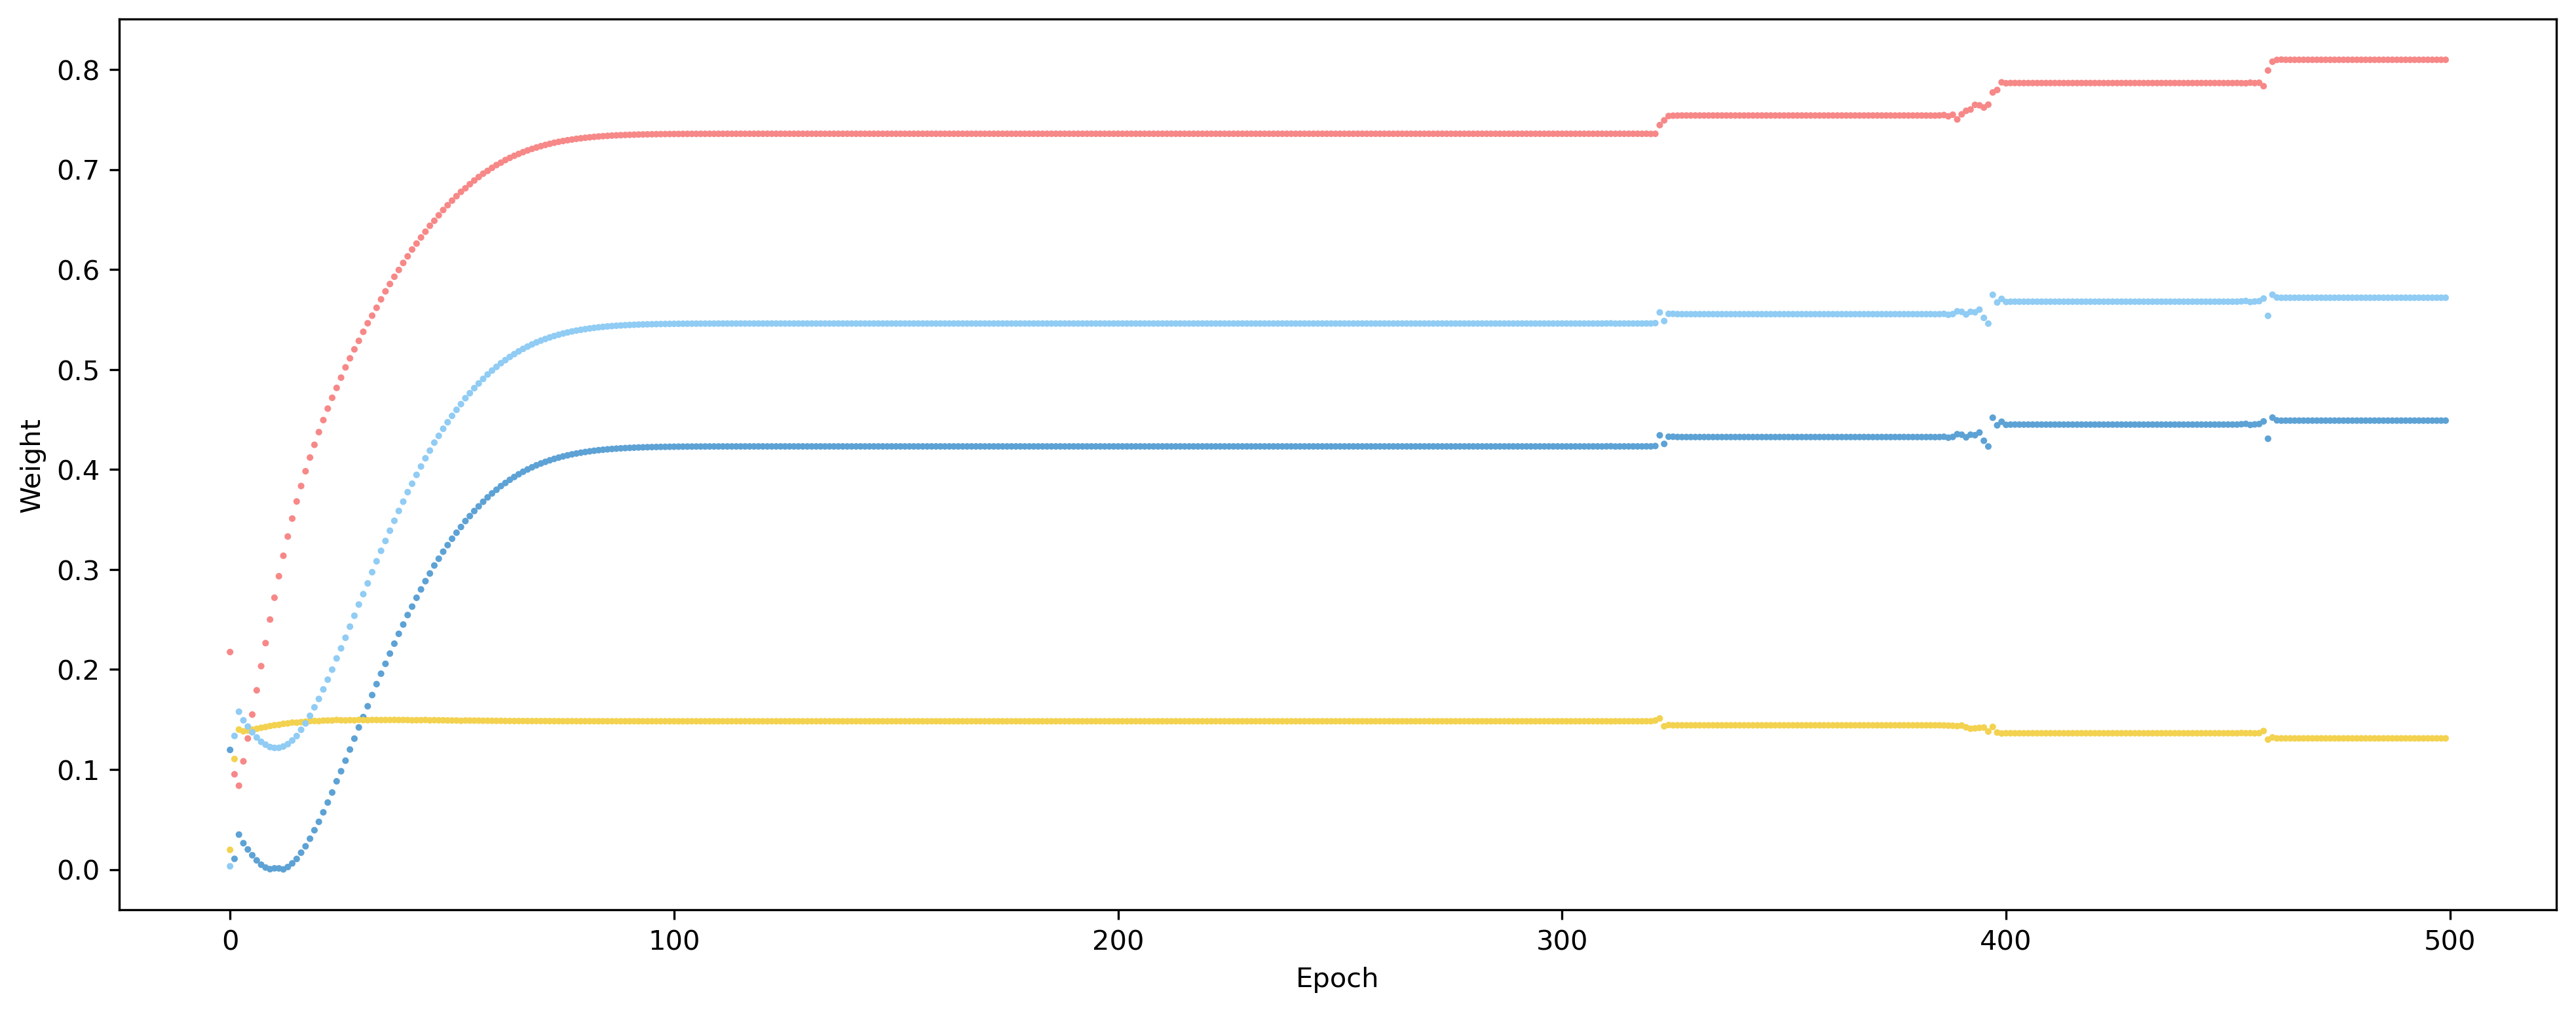

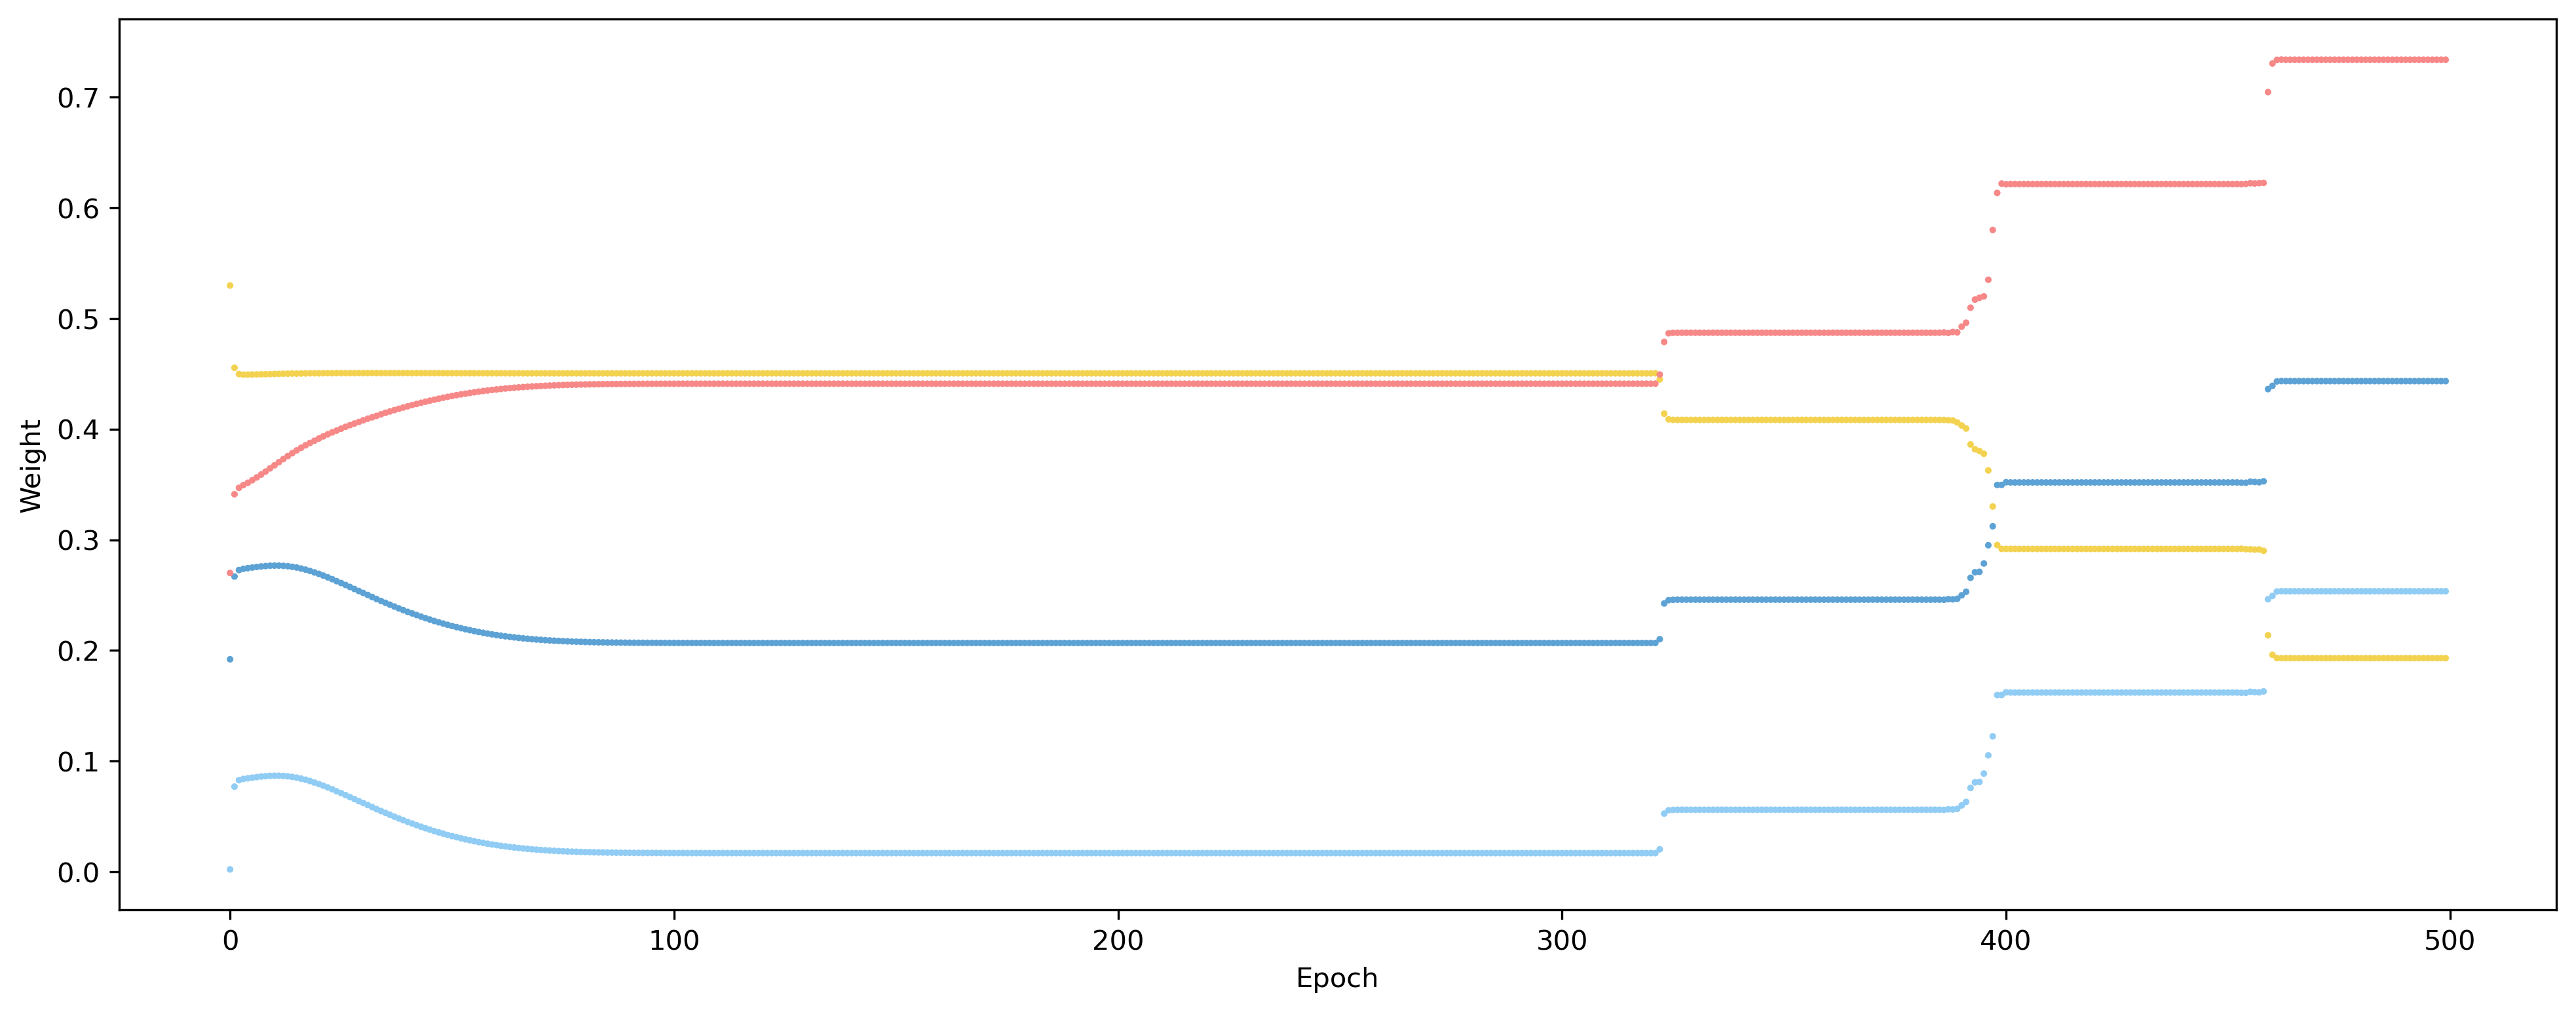

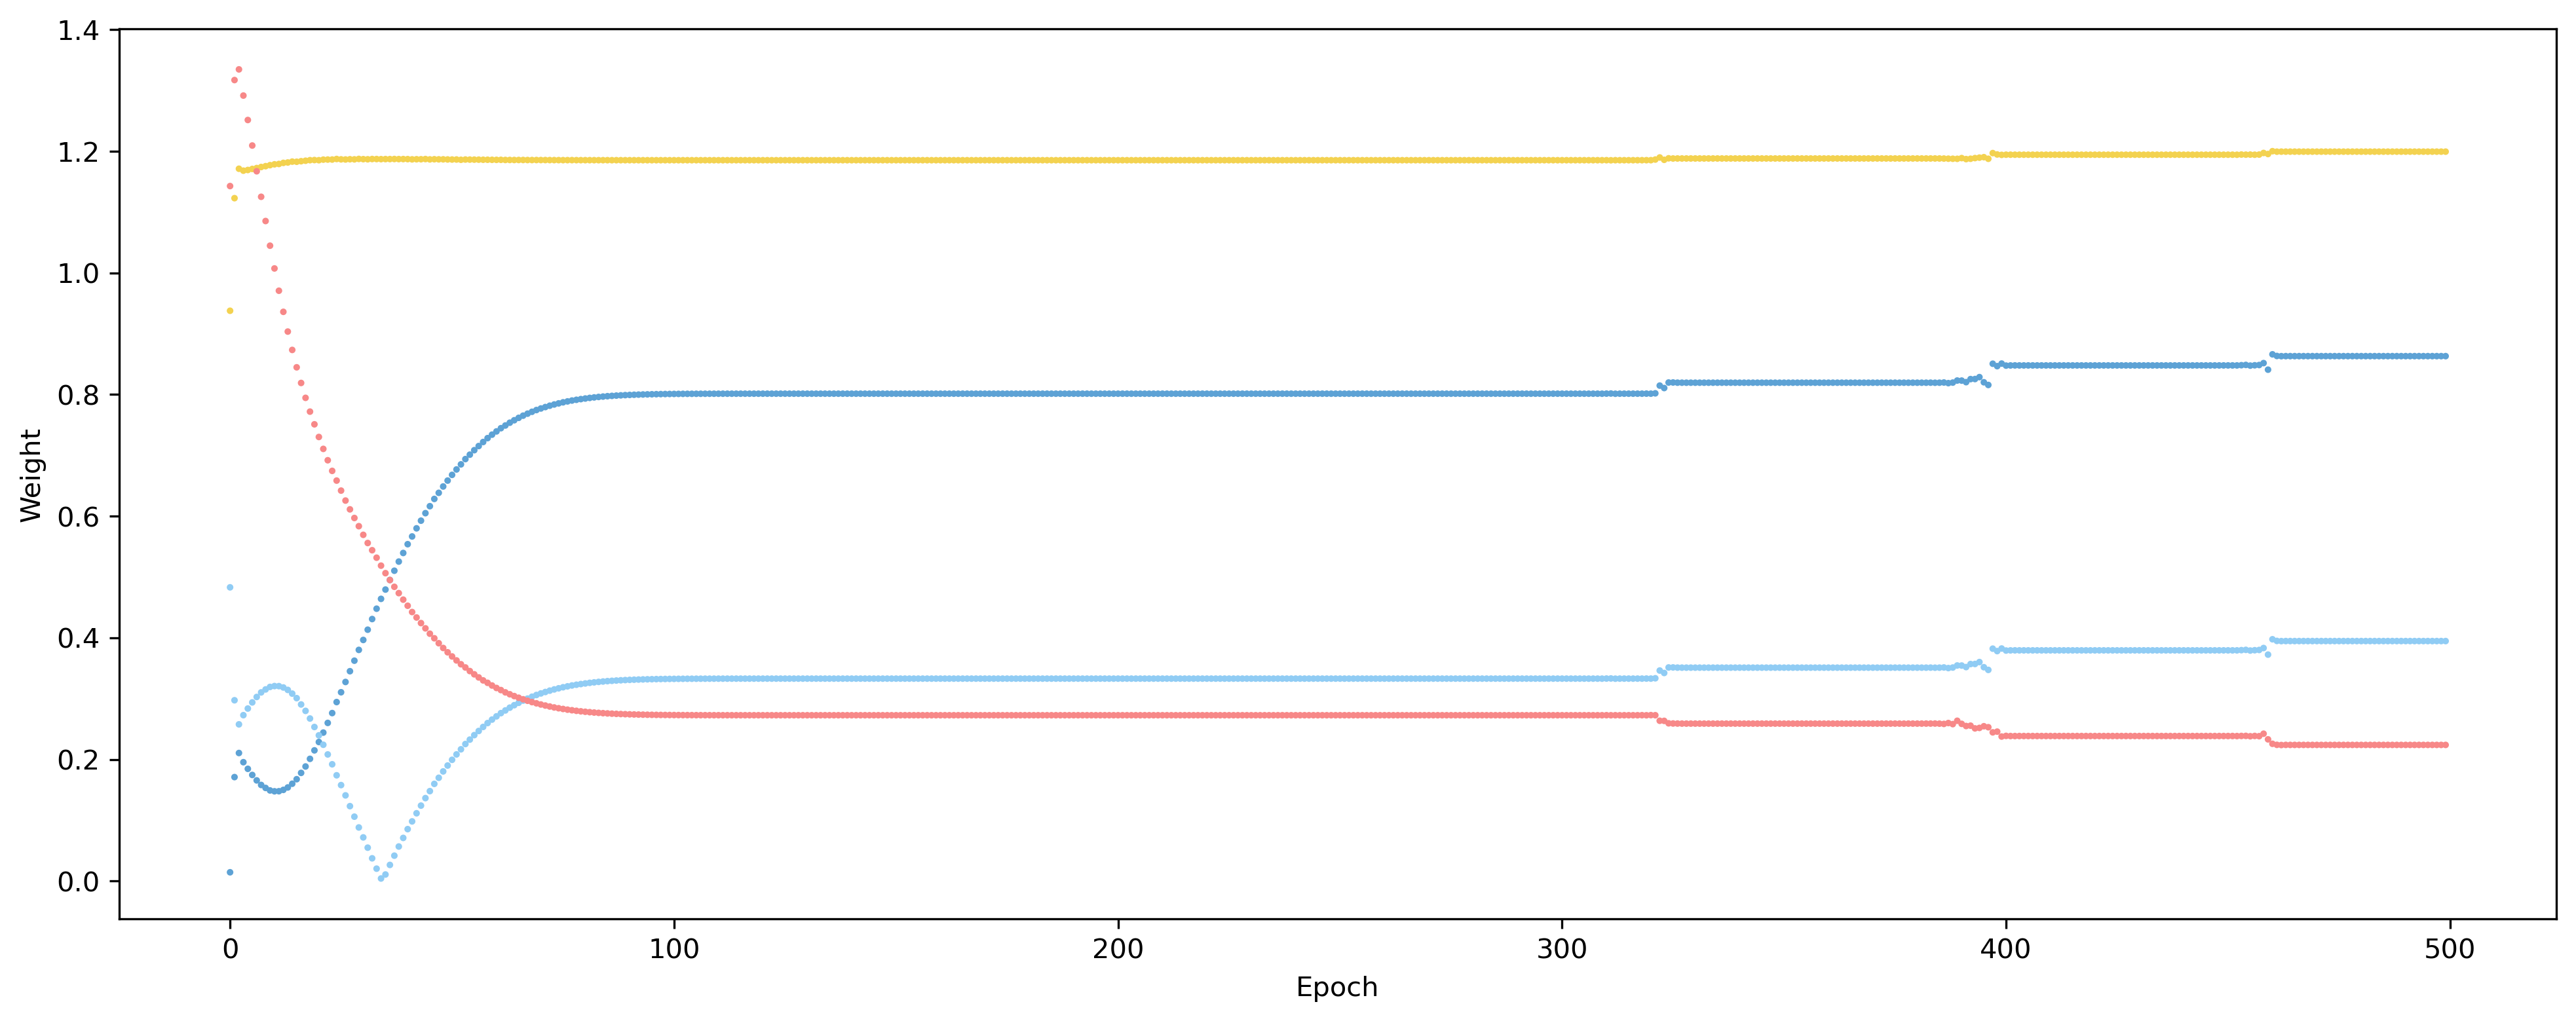

In [37]:
for group in groups:
    sdf = call_prepare_scatter_df(group, True)
    create_scatter(sdf)

### Plotting Standard Deviations

In [35]:
import math
def plot_stds(group):
    fig, ax = plt.subplots(figsize=(16,6))
    domain = np.linspace(-2,2,1000)
    means = [mean(group[0]), mean(group[1]), mean(group[2]), mean(group[3])]
    stds = [stdev(group[0]), stdev(group[1]), stdev(group[2]), stdev(group[3])]
    colors = [darker, important, light, noise]

    for mu, std, color in zip(means, stds, colors):
        probs = norm.pdf(domain, mu, std)
        ax.plot(domain, probs, color=color)
        ax.set_xlabel("Weight")
        ax.set_ylabel("Probability Density")

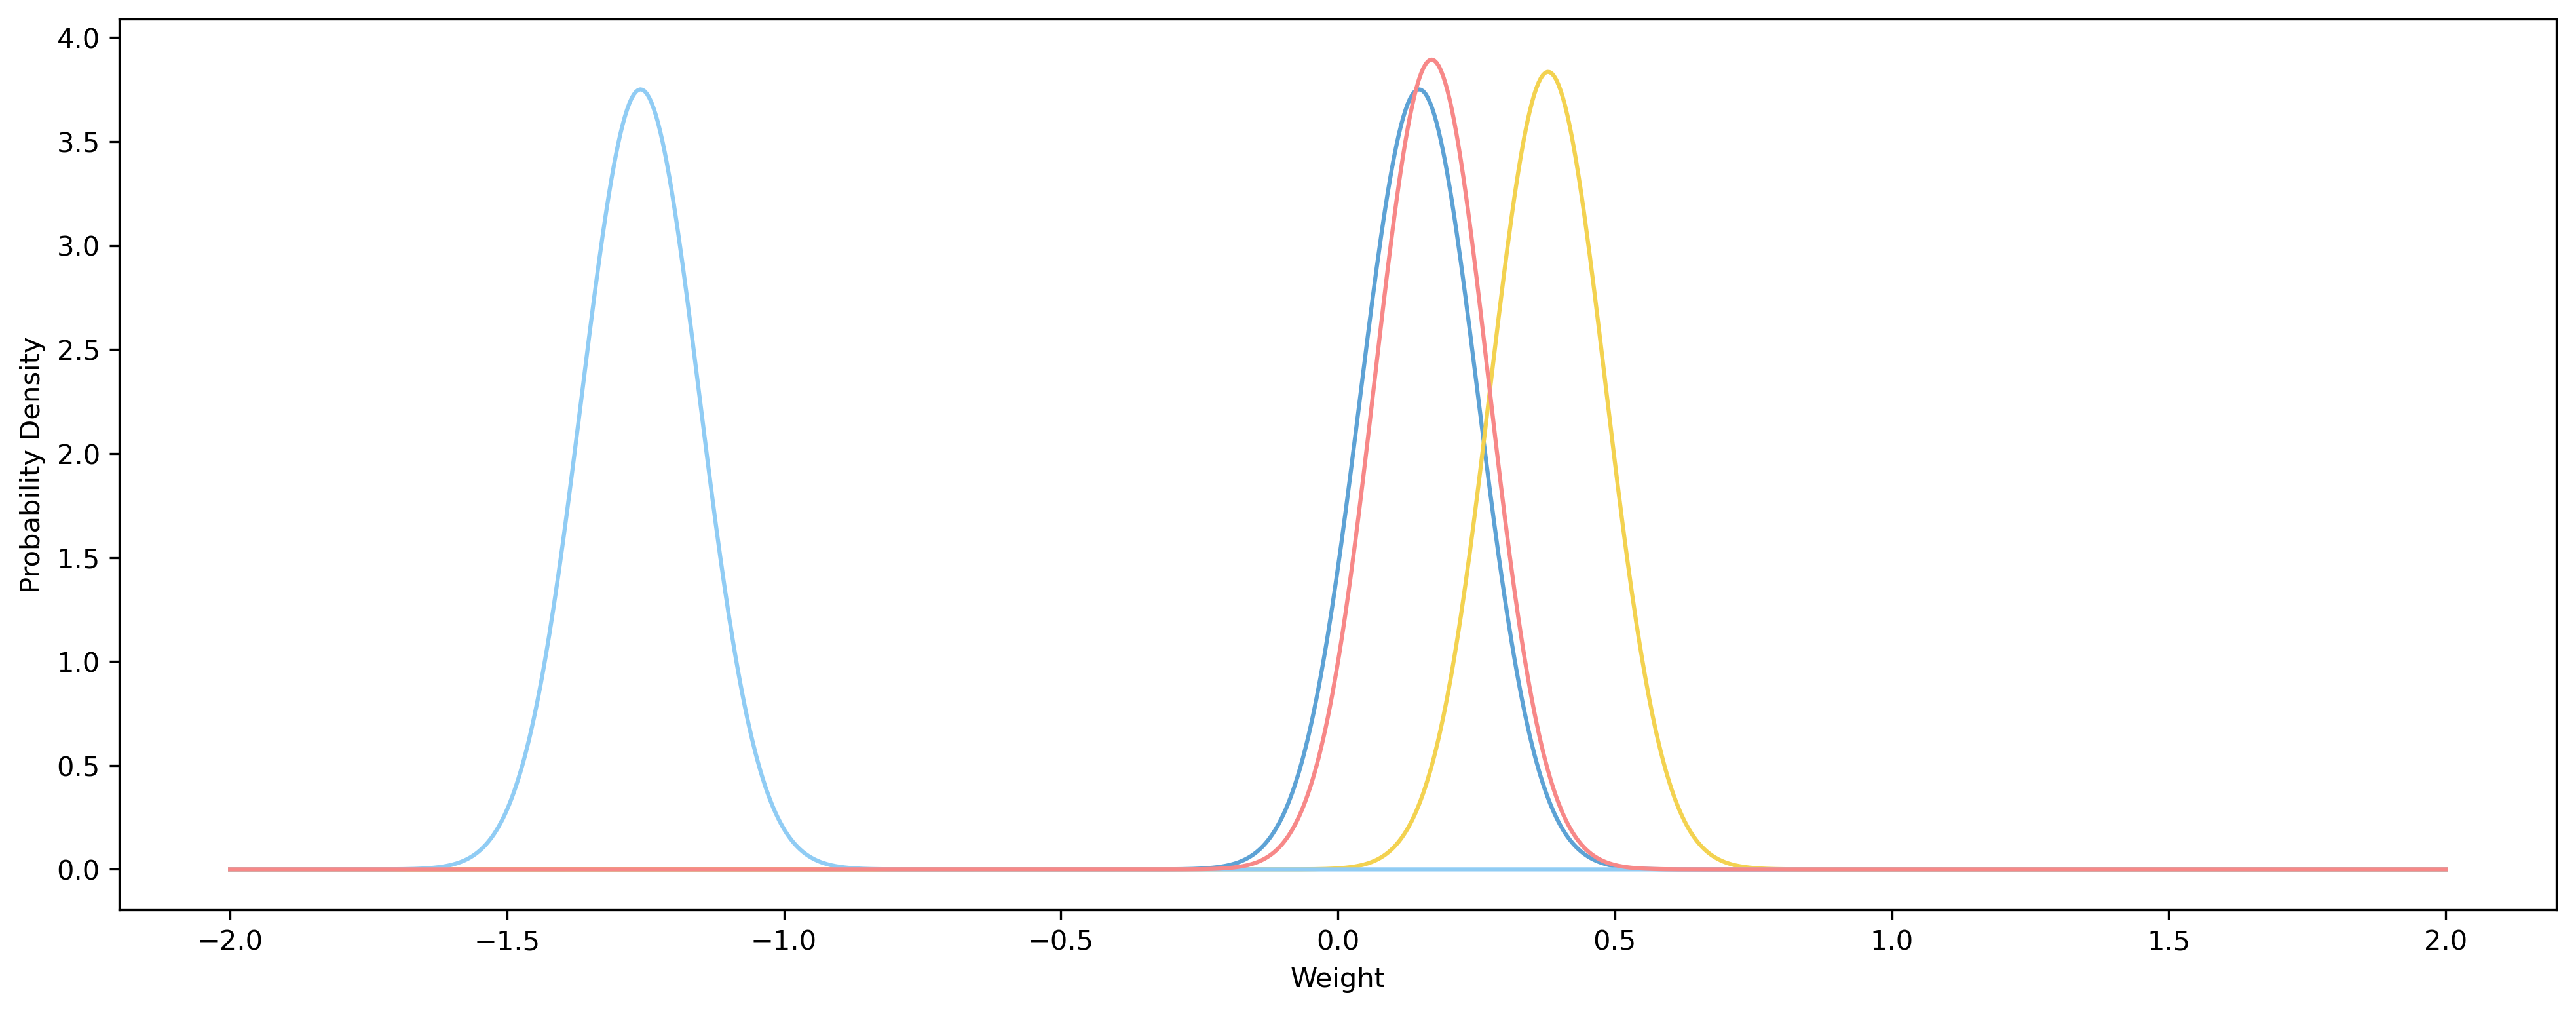

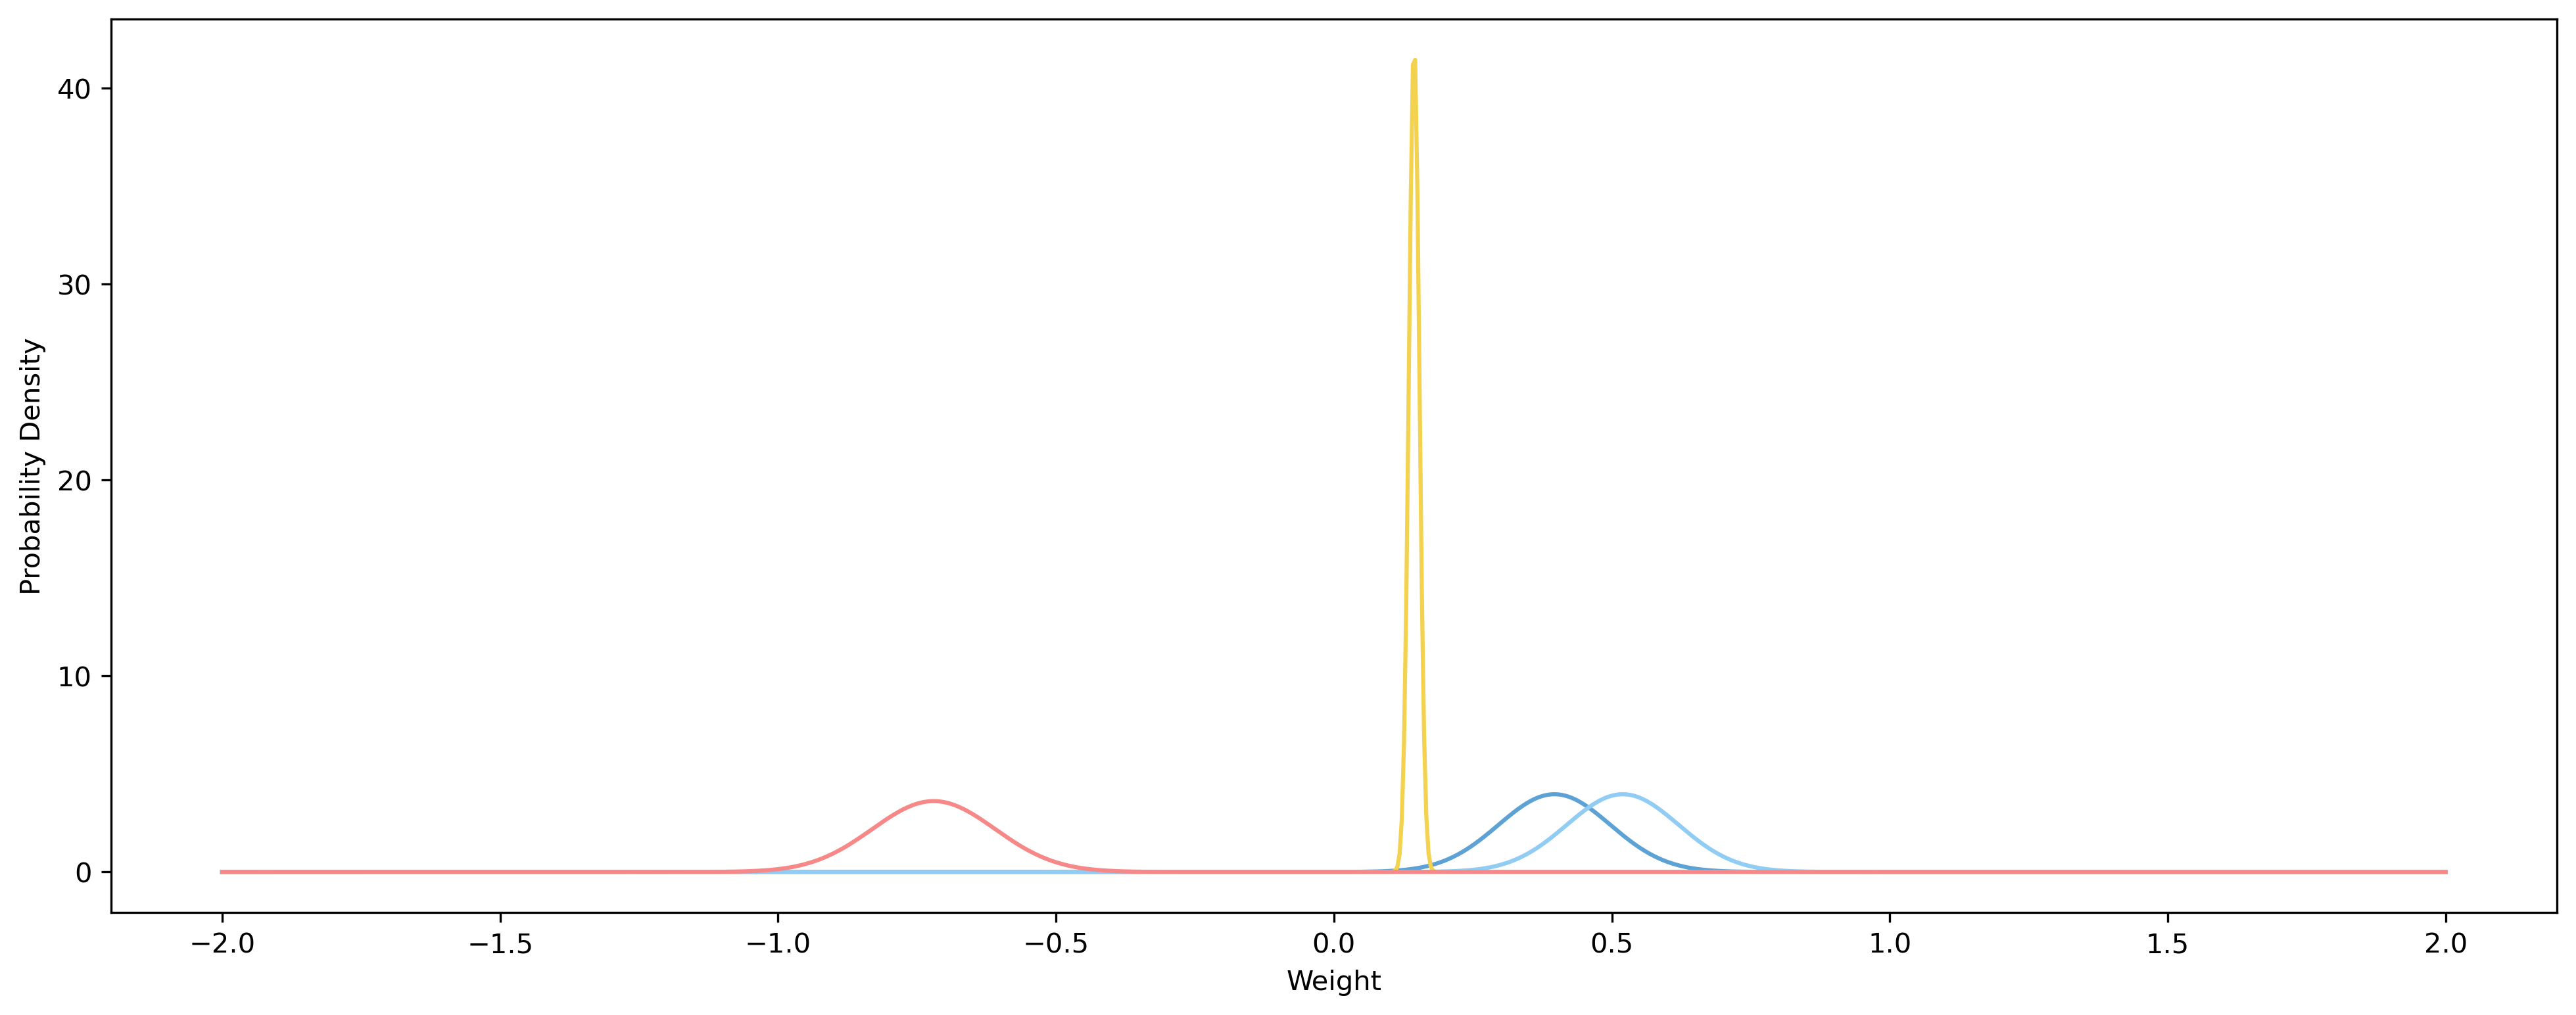

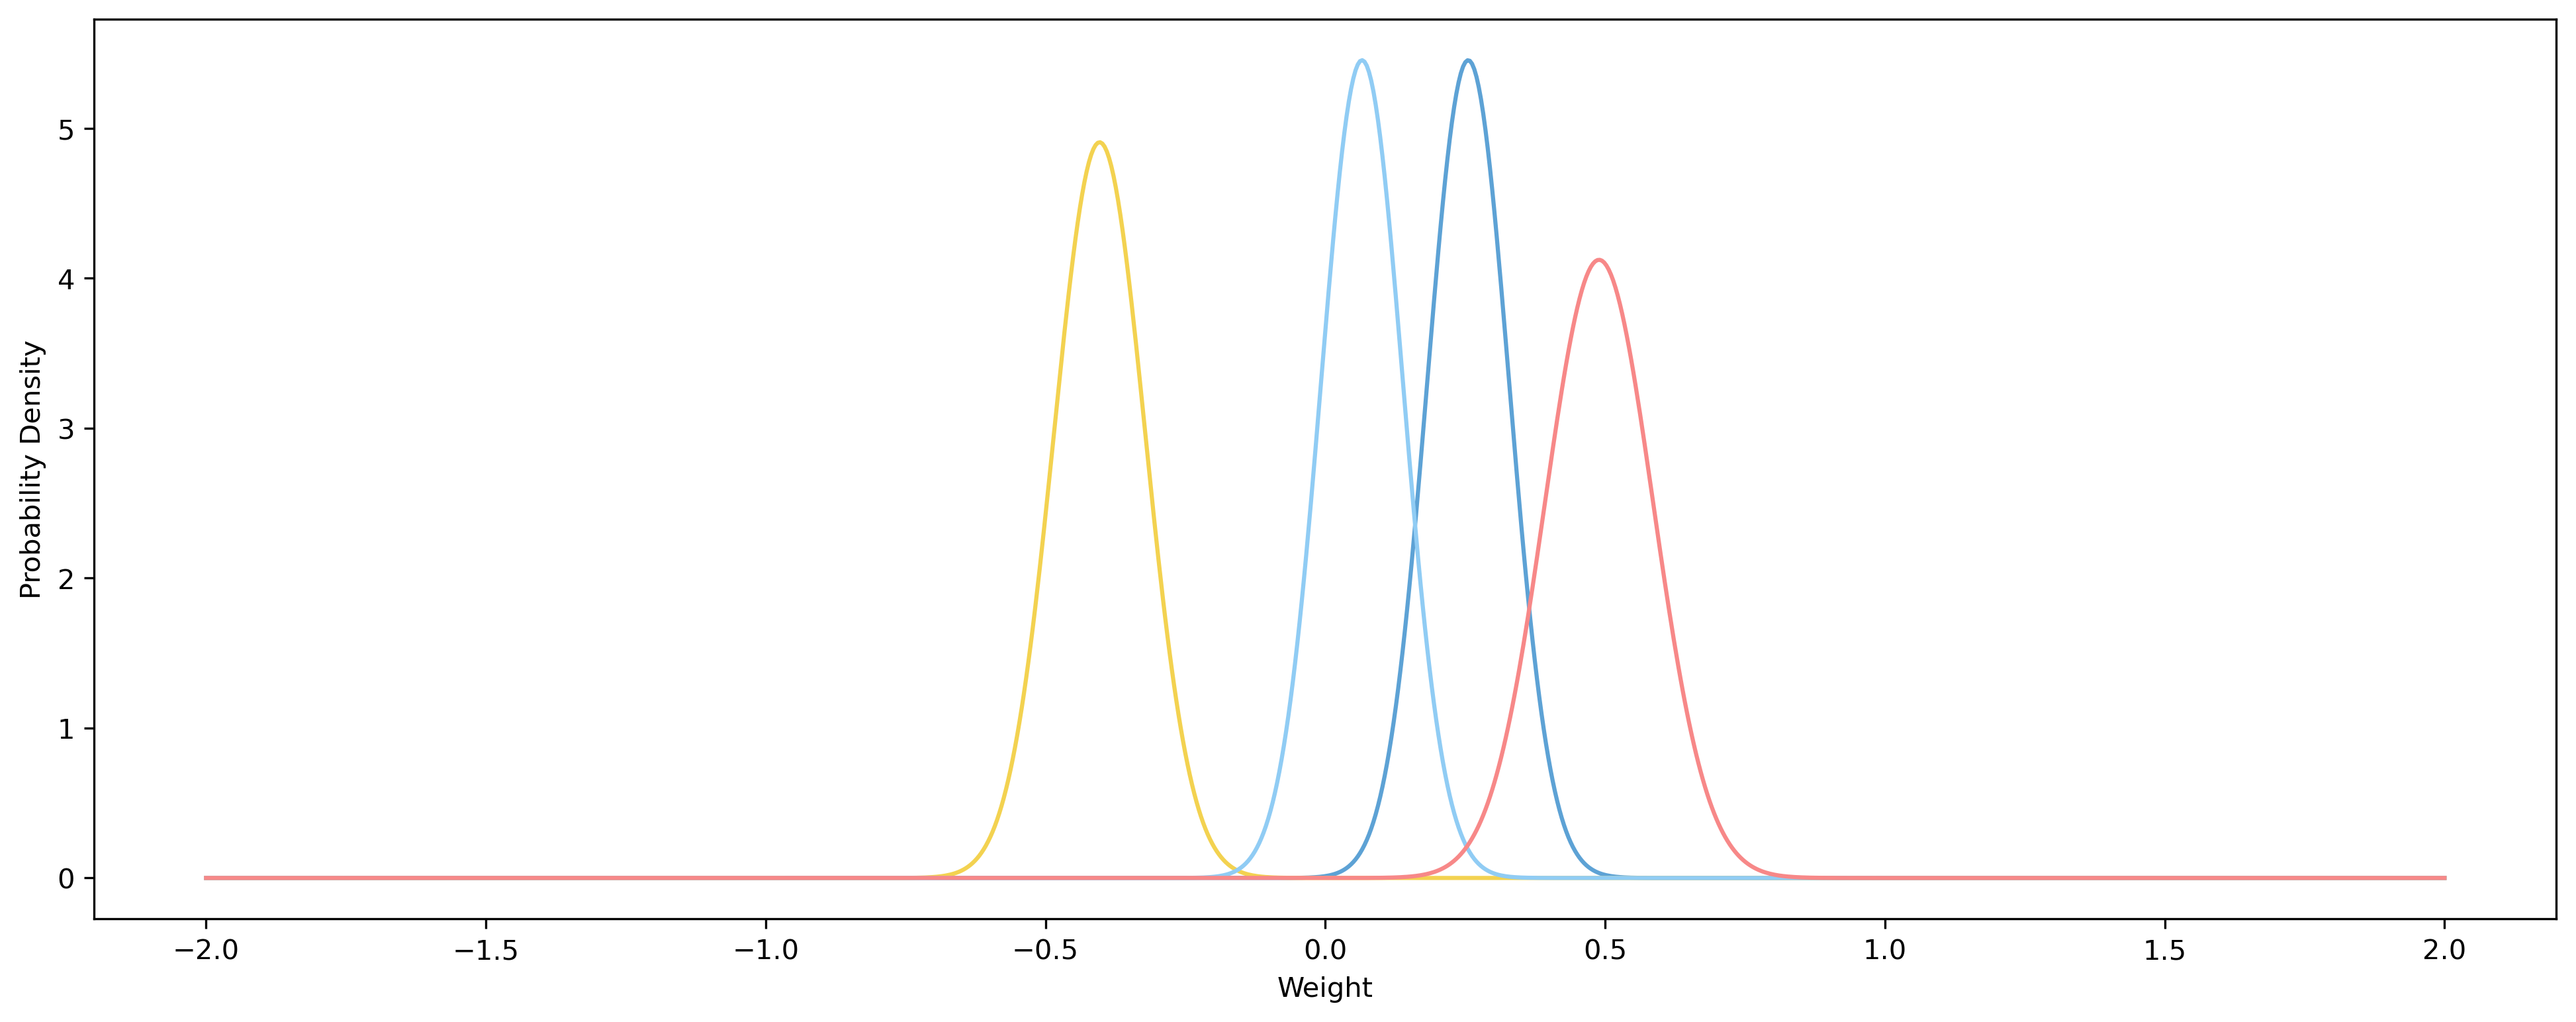

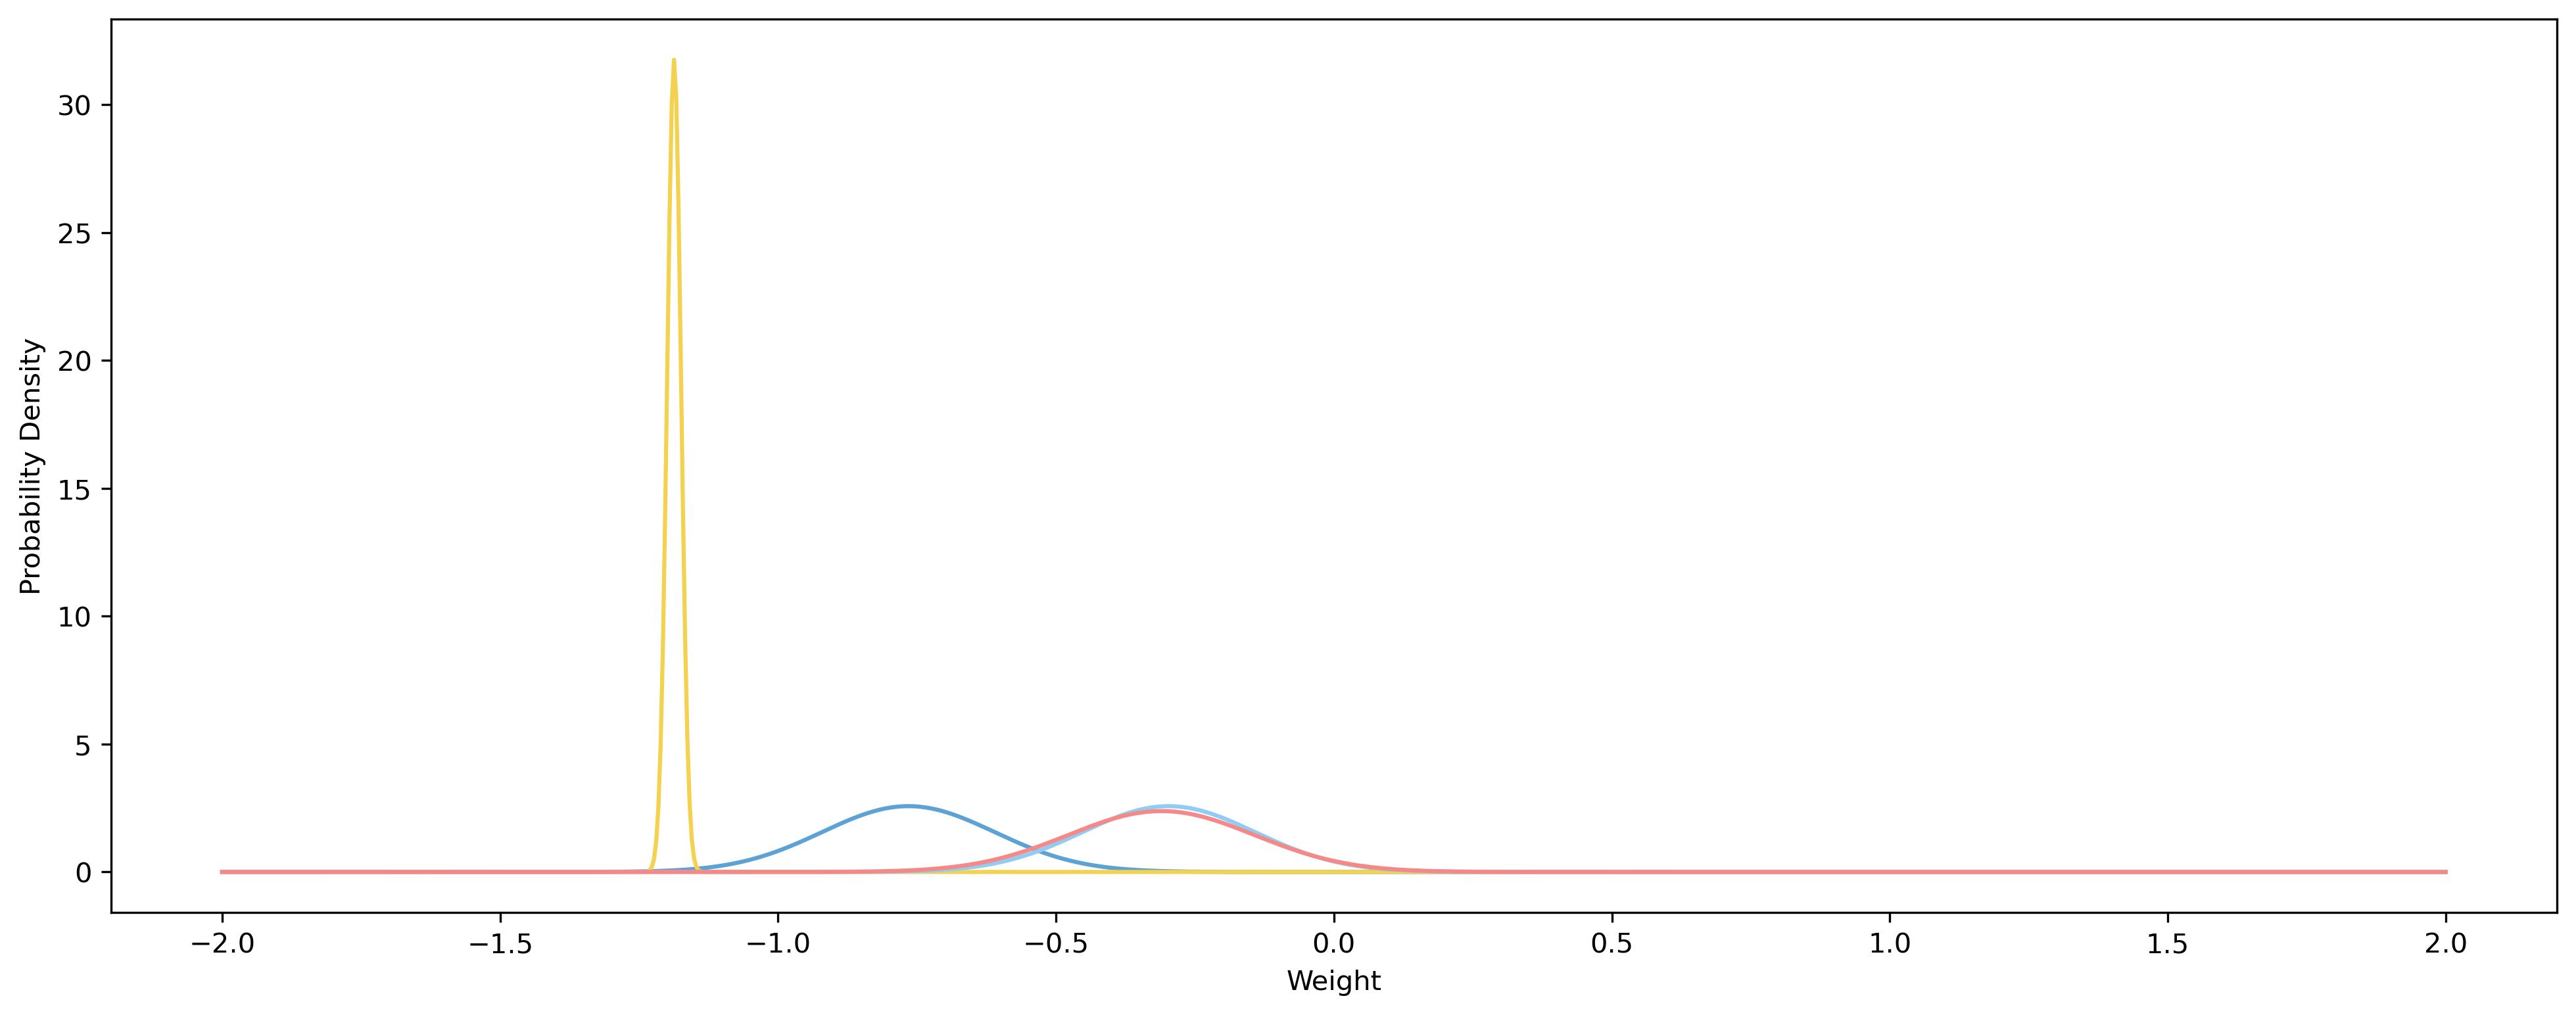

In [38]:
for group in groups:
    plot_stds(group)

In [39]:
def get_props(group):
    domain = np.linspace(-2,2,1000)
    means = [mean(group[0]), mean(group[1]), mean(group[2]), mean(group[3])]
    stds = [stdev(group[0]), stdev(group[1]), stdev(group[2]), stdev(group[3])]
    results = []
    for mu, std in zip(means, stds):
        values = []
        probs = norm.pdf(domain, mu, std)
        for prob in probs:
            if math.floor(prob) != 0:
                values.append(prob)
        results.append(values)
    return results

In [40]:
all_probs = [get_props(group) for group in groups]

In [41]:
def barrage(all_prob, nodes: int):
    res = {i: {"len": 0, "max": 0, "sum": 0, "mean": 0, "stdev": 0} for i in range(nodes)}
    for probs in all_probs:
        for i, prob in enumerate(probs):
            res[i]["len"] += len(prob)
            res[i]["max"] += max(prob)
            res[i]["sum"] += sum(prob)
            res[i]["mean"] += mean(prob)
            res[i]["stdev"] += stdev(prob)
    return res

In [43]:
columns = ["ms", "xs", "cs", "noises"]

res = barrage(all_probs, len(columns))
for i in range(len(columns)):
    res[columns[i]] = res.pop(i)
res

{'ms': {'len': 344,
  'max': 15.743479393354953,
  'sum': 890.6670772025731,
  'mean': 10.70368244871297,
  'stdev': 3.8482927585804387},
 'xs': {'len': 186,
  'max': 81.95611604434109,
  'sum': 950.3193192189942,
  'mean': 41.03629842682707,
  'stdev': 28.032673872804402},
 'cs': {'len': 343,
  'max': 15.744497167129623,
  'sum': 889.6752018257113,
  'mean': 10.724192544075674,
  'stdev': 3.835926483499415},
 'noises': {'len': 364,
  'max': 14.011537499588522,
  'sum': 876.6826174351299,
  'mean': 9.826817361521247,
  'stdev': 3.2428498907964642}}

''

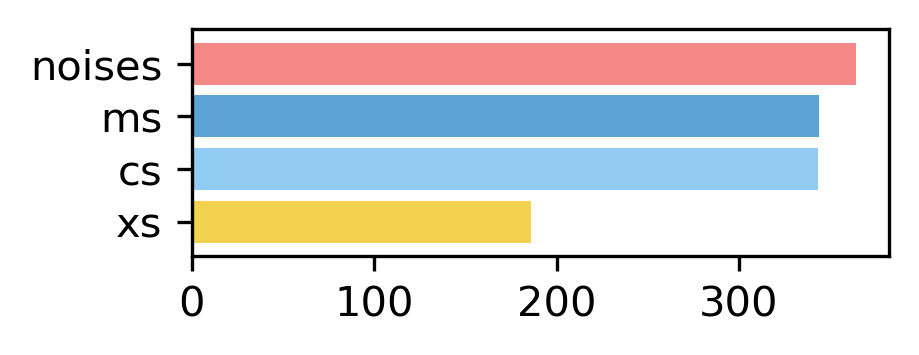

In [62]:
df = pd.DataFrame(res)
cmap = np.array([darker, important, light, noise])
pd.Series(df.loc["len"],df.columns).sort_values(ascending=True).plot.barh(width=0.8, figsize=(3,1), color=[important, light, darker, noise])
;

Important features
____________________________________________________________
100.0


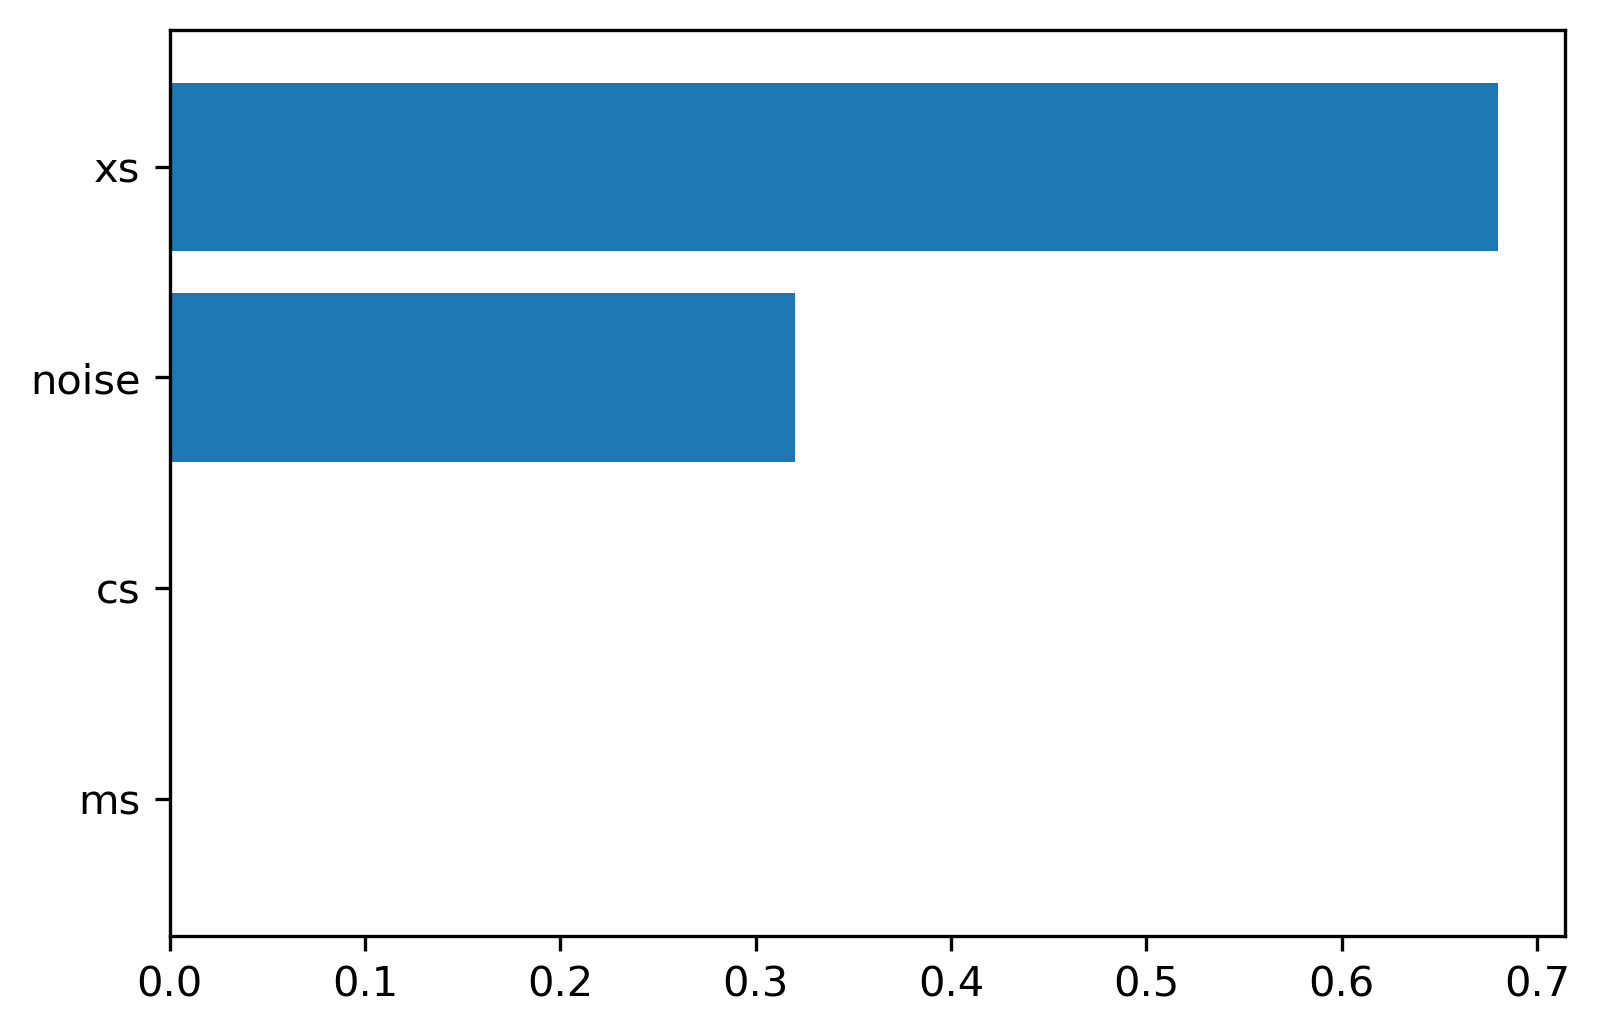

In [64]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(X_train, y_train)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

In [65]:
random_forest.feature_importances_

array([0.        , 0.68017226, 0.        , 0.31982774])

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
model = LogisticRegression()
model.fit(X_train, y_train)
importance = model.coef_[0]
importance

array([ 0.01471884, -0.79457314,  0.36797088,  0.02250673])